
<h2 style='text-align:center;font-size:50px;background-color:black;border:50px;color:white'>AVOCADO PROJECT REPORT <h2>

## Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

# Content

### This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

## Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

### Inspiration /Label :-
The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

# Lets do Regression first

In [1]:
import pandas as pd 
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now lets Load the dataset

df=pd.read_csv('avocado.csv')

df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


... Here in the dataset we can notice there are 14 columns which contains both Input and target variable.

... Here "Average Price" is the target variable or Output which contains continuous data so it is a Regression type problem.

... The dataset contains both numerical and categorical columns.

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8776,10,2018-01-14,1.46,617912.41,416705.54,53783.64,2713.93,144709.30,81480.75,63228.55,0.00,conventional,2018,MiamiFtLauderdale
13487,46,2016-02-07,1.90,96595.25,7260.63,23222.81,1329.99,64781.82,38548.58,26233.24,0.00,organic,2016,Northeast
11185,31,2015-05-24,0.89,22034.63,191.26,15349.07,0.00,6494.30,1124.50,5369.80,0.00,organic,2015,Roanoke
1187,43,2015-03-01,0.75,3094278.93,2145439.03,592196.29,61863.94,294779.67,269524.60,23570.43,1684.64,conventional,2015,LosAngeles
960,24,2015-07-12,0.79,999607.51,559622.59,307628.06,3226.08,129130.78,71467.17,57474.72,188.89,conventional,2015,Houston


In [6]:
df.shape

(18249, 14)

#### So dataset have 18249 rows and 14 columns with target

#### As we can see Unnamed:0 is only for showing index and which is not contributing to target variable so i will drop this column

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### All columns name of dataset

In [8]:
# Dropping the column Unnamed:0 bcz its useless for predictions
df.drop("Unnamed: 0",axis=1, inplace=True)

In [9]:
df.shape

(18249, 13)

### now 18249 rows and 13 columns

In [10]:
## lets identify which data types columns belong too

df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

#### As we can see that Data columns is in object format which is needed to be corrected.. Average Price which is ourr Target variable which is in continuous format that mean regression problem..AveragePrice ,Total Volume   ,4046   ,4225   ,4770  ,Total Bags  ,SmallBags ,Large Bags    are in float 64 ,type is in object and year is in int 64 and region in object 

### Before Moving ahead as we can see that our Date column is in Object format which is required to be corrected ,so lets correct it 1st.

In [11]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [14]:
# Now Lets Drop Date columns from the dataset bcz we have already made the columns for Month and day in the dateset above 
# Year columns was already pre mentioned in the dateset

df.drop("Date",axis=1,inplace=True)

In [15]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [16]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [17]:
# Lets see Unique Values inside the target variables
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [18]:
len(df['AveragePrice'])


# total lenght of the target columns

18249

In [19]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

#### Value count of each unique value in target vairable

<h2 style='text-align:center;font-size:40px;background-color:black;border:35px;color:white'> Checking Null Values in the dataframe <h2>

In [20]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

<AxesSubplot:>

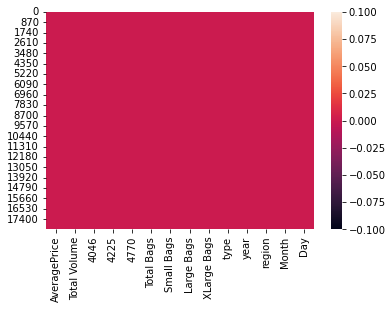

In [21]:
sns.heatmap(df.isnull())

#### So graphically we can see that there there is no null values in any column

<h2 style='text-align:center;font-size:40px;background-color:black;border:35px;color:white'> EDA <h2>


In [22]:
df.shape

(18249, 14)

In [23]:
#Checking the information about dataset such Memory used, data types and Non Null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


#### Only type and region column are object data type which we will encode later

In [24]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

#### Every column have a lot of unique vqlues

In [25]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]

In [26]:
duplicateRows

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


#### There are no duplicate value present in dataset

<h2 style='text-align:center;font-size:30px;background-color:black;border:30px;color:white'> A.Univariate Analysis <h2>

In [27]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [28]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

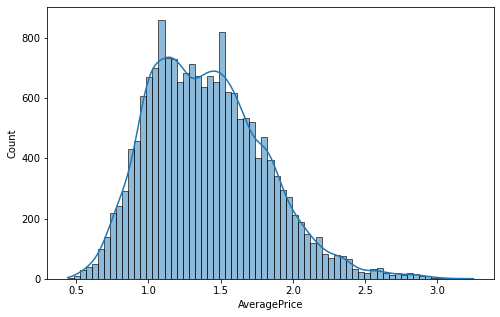

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['AveragePrice'],kde=True)

In [30]:
df['AveragePrice'].mean()

1.4059784097758825

#### WE can see that the average price of maximum purchased avocado is between 1.0 to 1.6 and the mean of the price to fall within this i.e 1.4059784097758825

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

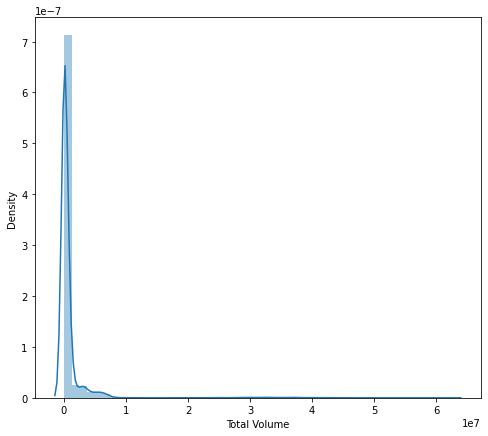

In [31]:
plt.figure(figsize=(8,7))
sns.distplot(df['Total Volume'])

#### Total Volume is skewed which will be treated alter

<AxesSubplot:xlabel='4046', ylabel='Density'>

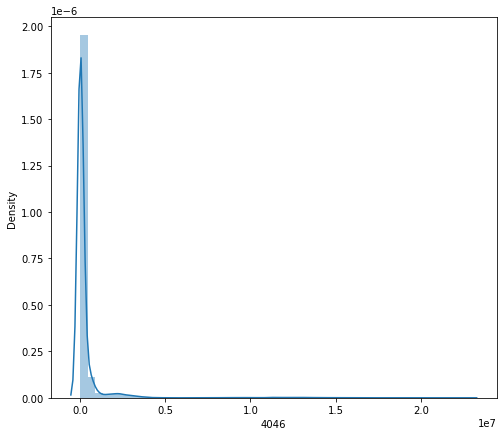

In [32]:
plt.figure(figsize=(8,7))
sns.distplot(df['4046'])

#### Column 4046 is skewed which will be treatted later

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

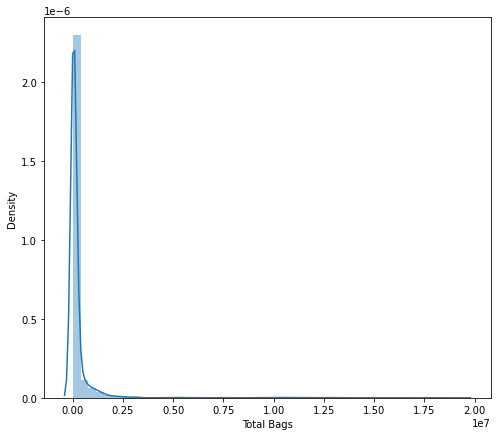

In [33]:
plt.figure(figsize=(8,7))
sns.distplot(df['Total Bags'])

#### Total Bags is also skewed which will be treated later

<AxesSubplot:xlabel='type', ylabel='count'>

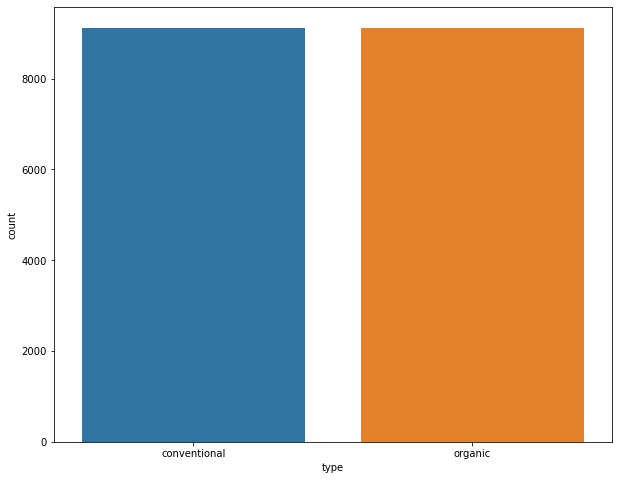

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(df['type'])

#### Types are almost of the same size as show above ,lets check by value count


In [35]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

#### Value count of type are nearly equal with only 3 units difference

#### Lets plot all the graphs together any do the Univariate analysis but 1st make list of all the columns which are numerical..

In [36]:
# Now checking for numerical columns
no_1=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        no_1.append(i)
print(no_1)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


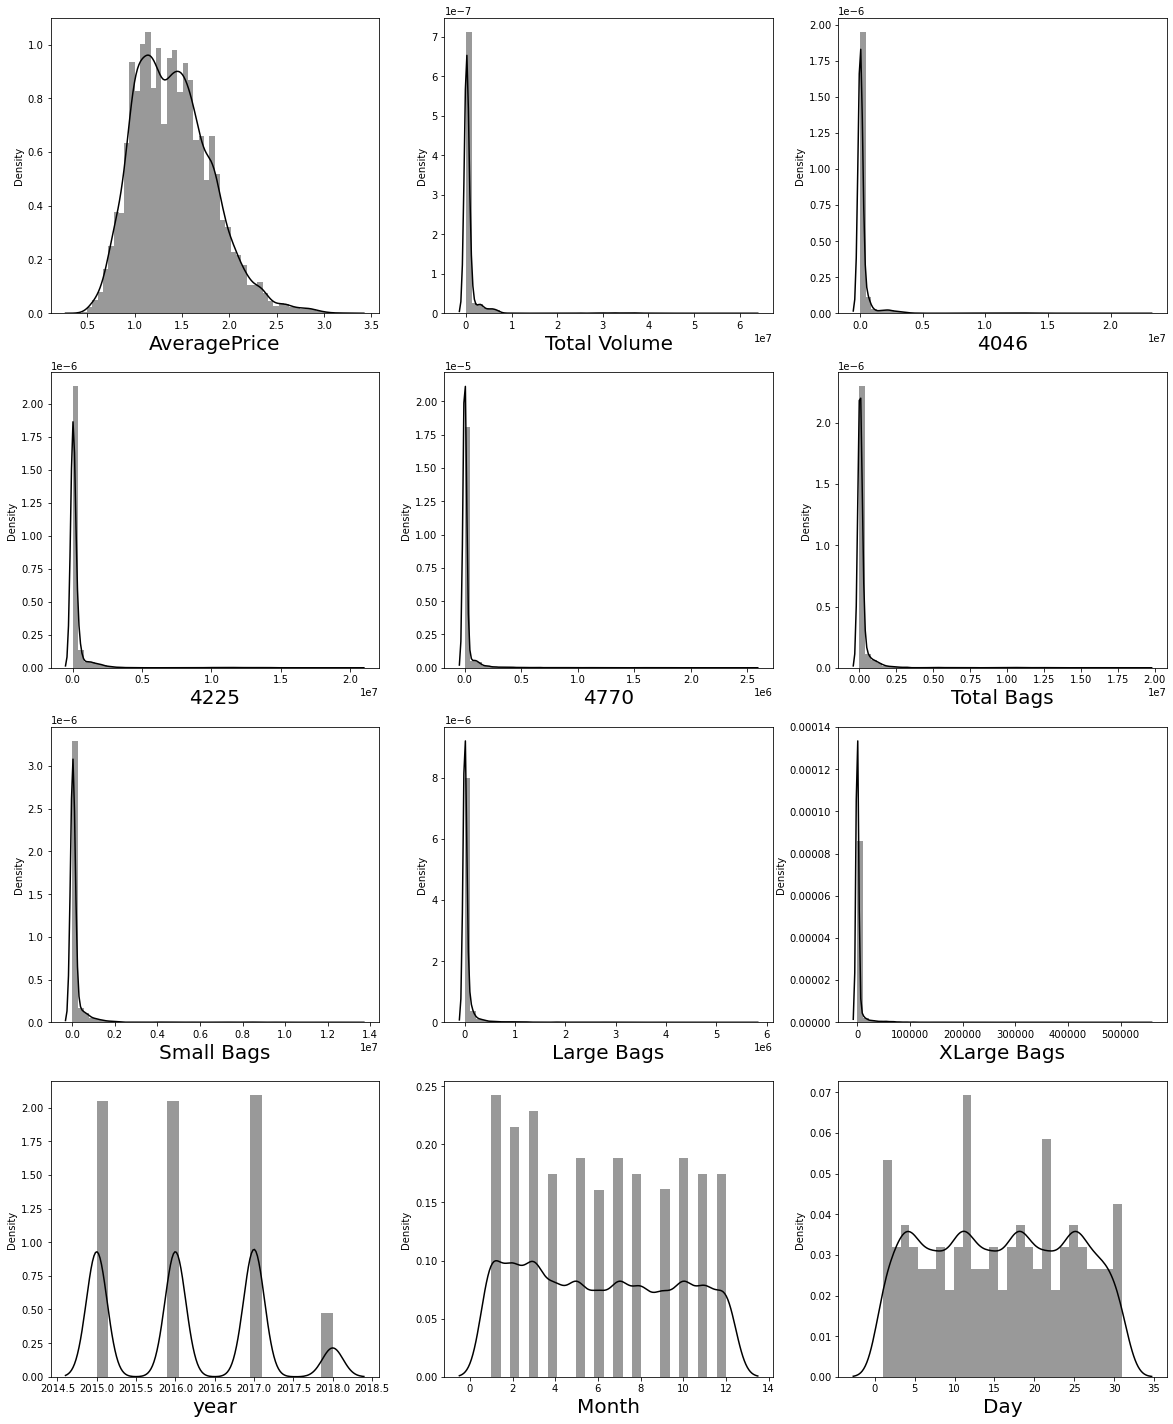

In [37]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in no_1:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='black')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

AveragePrice ,Total Volume ,4046 ,4225 ,4770 ,Total Bags ,Small Bags ,Large Bags ,XLarge Bags

All these above columns have skewness and they all are left skewed ↟

We can see that in year column the least sales of avocado is in 2018 and 2015,2016 & 2017 have almost same kind of sales

In Month jan,Feb and Mar the sale is max, and the least seems to be in august and september

<h2 style='text-align:center;font-size:30px;background-color:black;border:30px;color:white'> B. Bivariate Analysis <h2>

In [38]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

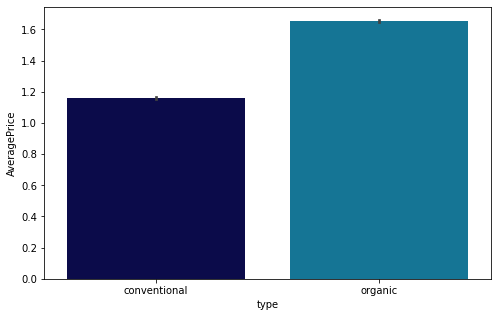

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x='type',y='AveragePrice',data=df,palette='ocean')

#### Here we can see that the organic products are costlier than conventional product.. 

<AxesSubplot:xlabel='type', ylabel='Total Bags'>

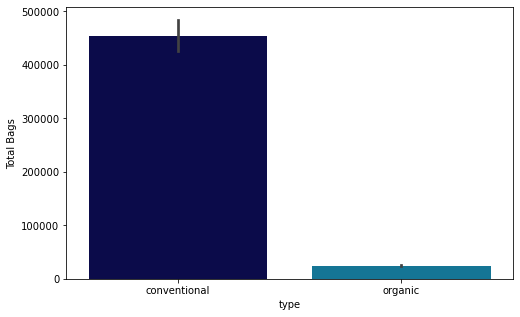

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x='type',y='Total Bags',data=df,palette='ocean')

#### Here we can see that the coventional avocado is more purchased by the people because the reason organic product is costlier and are not easily available as compared to conventional product

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

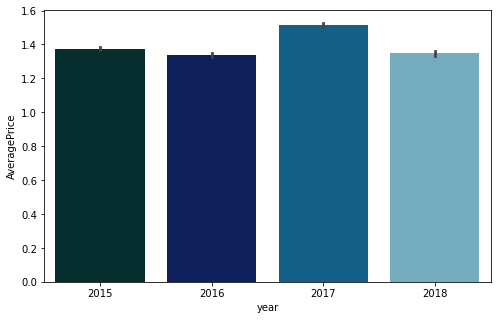

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='AveragePrice',data=df,palette='ocean')

#### The price of Avocado is maximum in 2017 and in 2015,2016 & 2018 are almost same..

<AxesSubplot:xlabel='year', ylabel='Total Bags'>

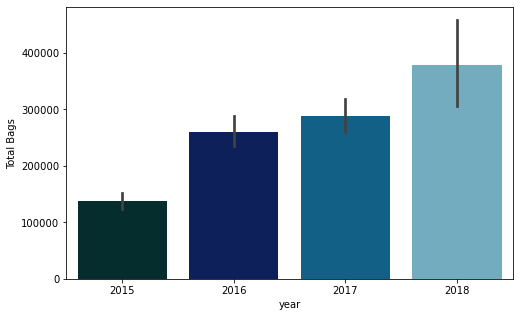

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='Total Bags',data=df,palette='ocean')

#### In 2018 the total numbers of bag sold were maximum.. From 2015 to 2018 we see a positive increase in the Total bags sold

<AxesSubplot:xlabel='year', ylabel='Small Bags'>

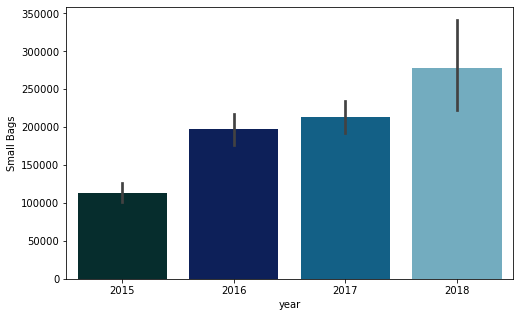

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='Small Bags',data=df,palette='ocean')

#### In 2018 the total numbers of bag sold were maximum.. From 2015 to 2018 we see a positive increase in the Small bags sold

<AxesSubplot:xlabel='year', ylabel='XLarge Bags'>

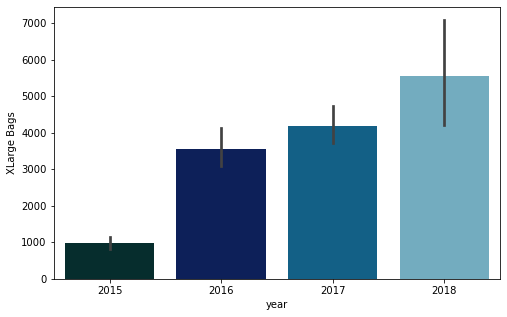

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='XLarge Bags',data=df,palette='ocean')

<AxesSubplot:xlabel='year', ylabel='Large Bags'>

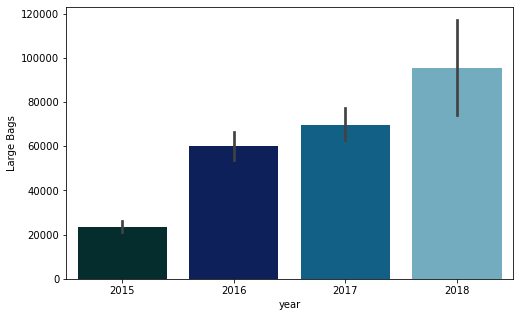

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='Large Bags',data=df,palette='ocean')

#### For Above 2 plots :- Its almost the same sales in all types of bags which is in 2018 the total numbers of bag sold were maximum.. From 2015 to 2018 we see a positive increase in the sales of Avocado

<AxesSubplot:xlabel='Month', ylabel='Total Bags'>

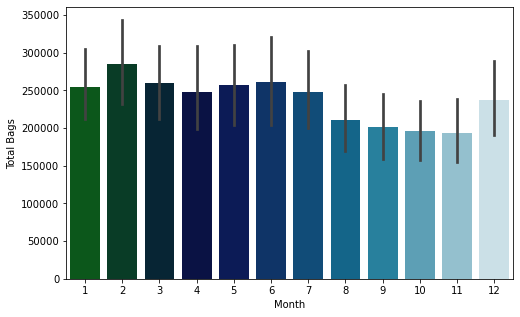

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(x='Month',y='Total Bags',data=df,palette='ocean')

#### In Feb(2) followed by june(6) is the highest sales month while considering total bags ..

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

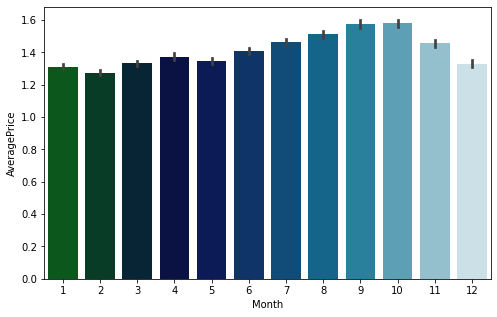

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Month',y='AveragePrice',data=df,palette='ocean')

#### we can make a conclusion from this plot that from june(6) the price kept on increasing till November(11) ..

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

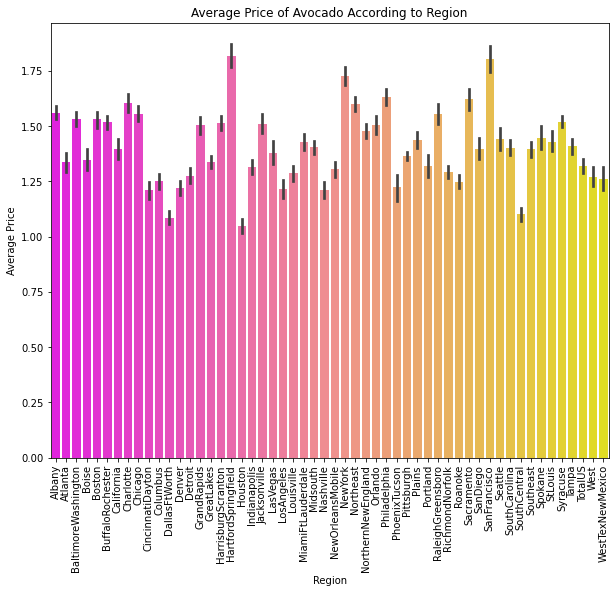

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(x='region',y='AveragePrice',data=df,palette='spring')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

We can see that these are the region where price is very high
harrisburgScranton

HartfordSpringfield

SanFrancisco

NewYork

Philadelphia

Sacramento

Text(0.5, 1.0, 'Total Volume of Avocado in the region')

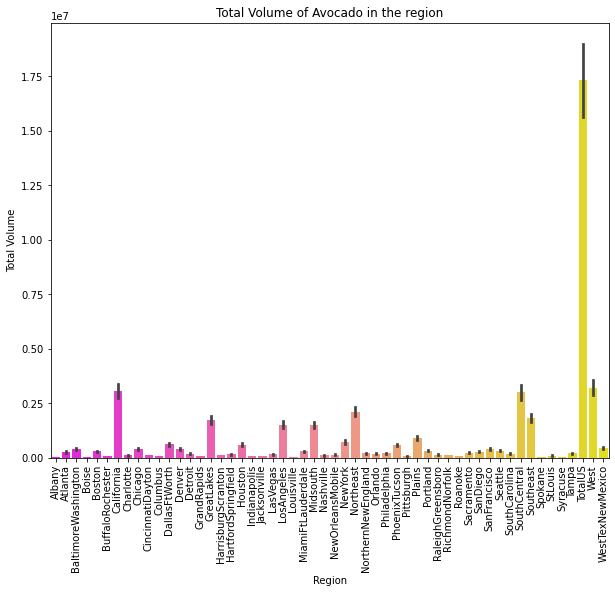

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x='region',y='Total Volume',data=df,palette='spring')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado in the region')

#### Apart from TotalUS ,the maximum consumption that we see is in California,South Central,SouthEast,West,NorthEast and Great Lakes

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

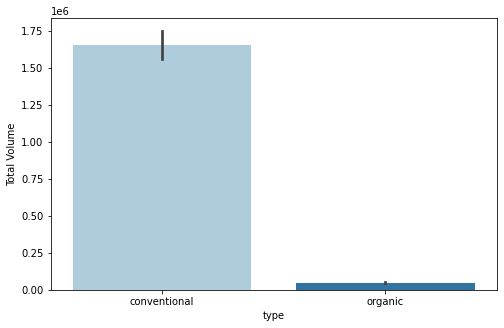

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x='type',y='Total Volume',data=df,palette='Paired')

#### In total volume the max volumne comprises of coventional avocado and organic is very less

<h2 style='text-align:center;font-size:30px;background-color:black;border:30px;color:white'> C. Multivariate Analysis <h2>

In [51]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

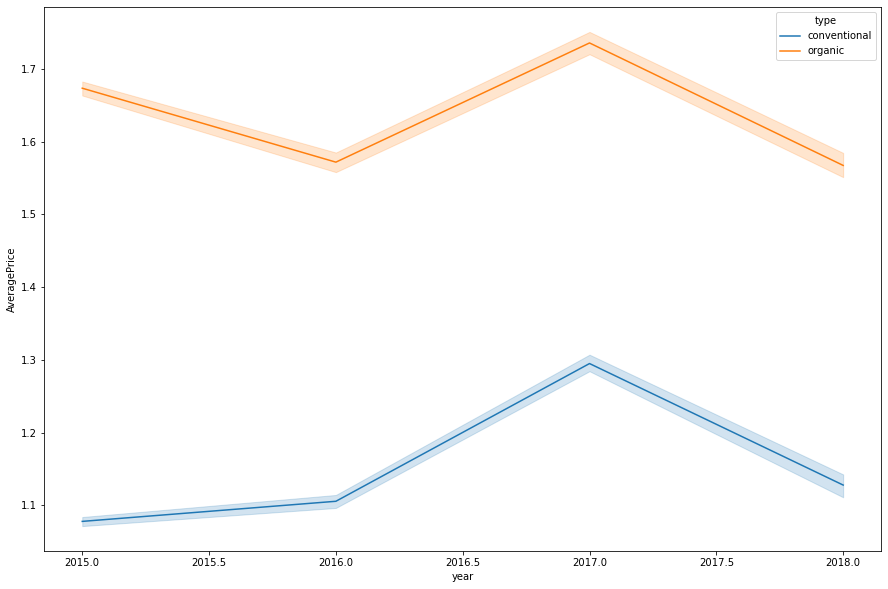

In [52]:
plt.figure(figsize=(15,10))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

##### We can see that from 2016 to 2017 positive growth or sales of both conventional and organic avacado.. there is slight growth in conventional avacado from 2015 to 2016... while organic avacado sales was decresing from 2015 to 2016... 2017 was peak of sales for  both conventional and organic.. we can say that conventional sales was more than organic sales

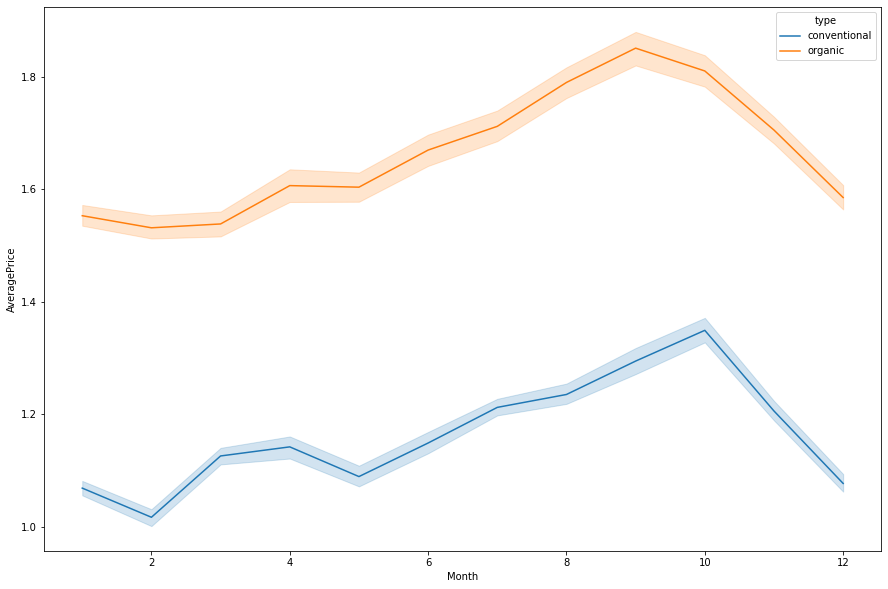

In [53]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

 We can say that there was sales hike from 5th month to 10th month for both.. 9th month has highest sales for organic sales...
and 10th month sales has highest sales for conventional sales

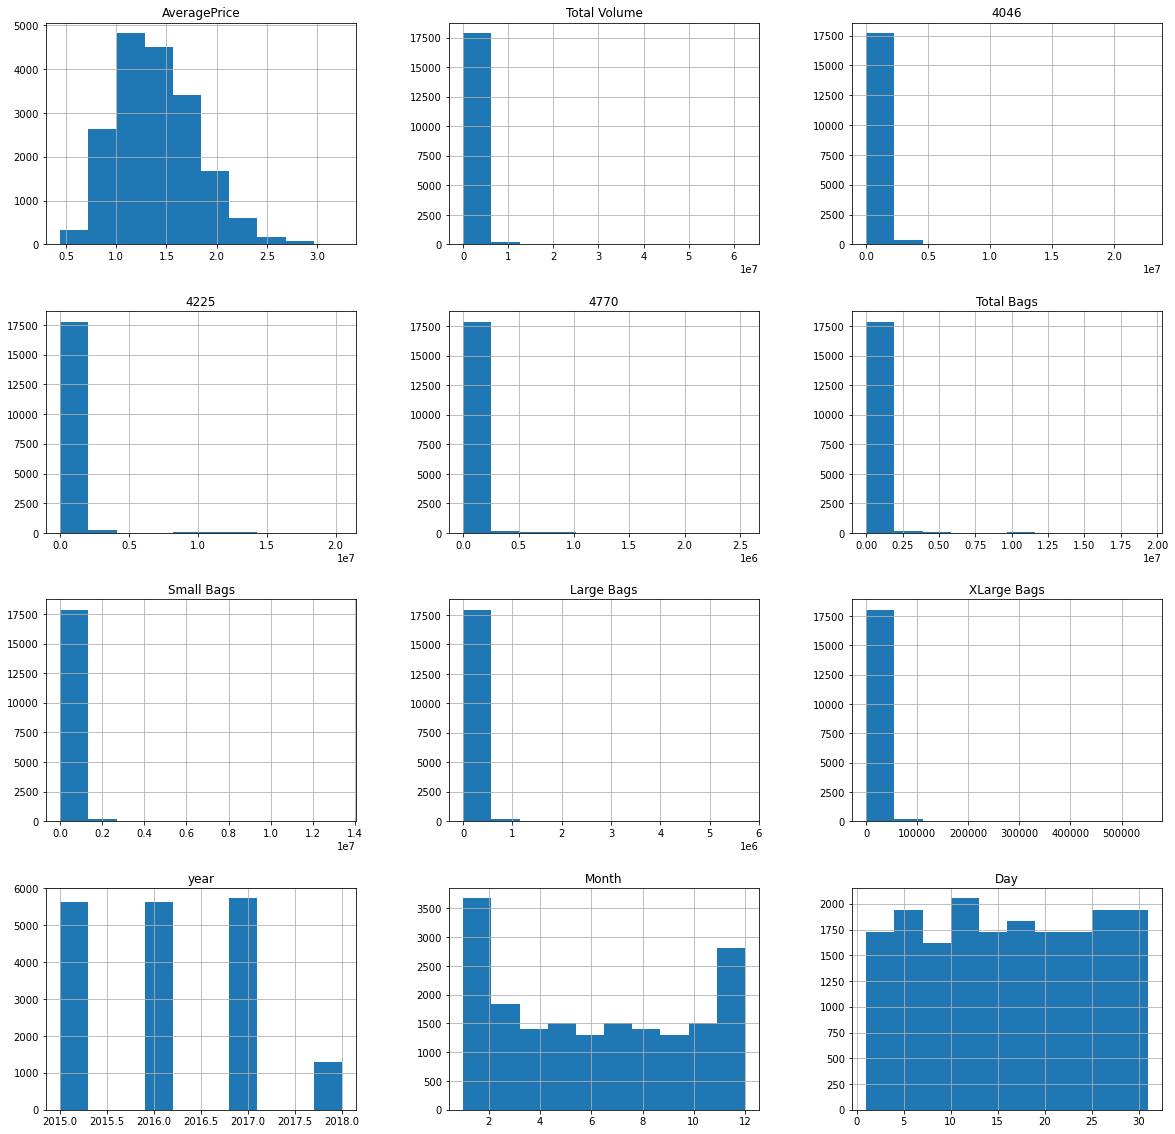

In [54]:
df.hist(bins=10, figsize=(20,20))
plt.show()

##### Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags'..All the above mentioned columns have skewness we will correct it later

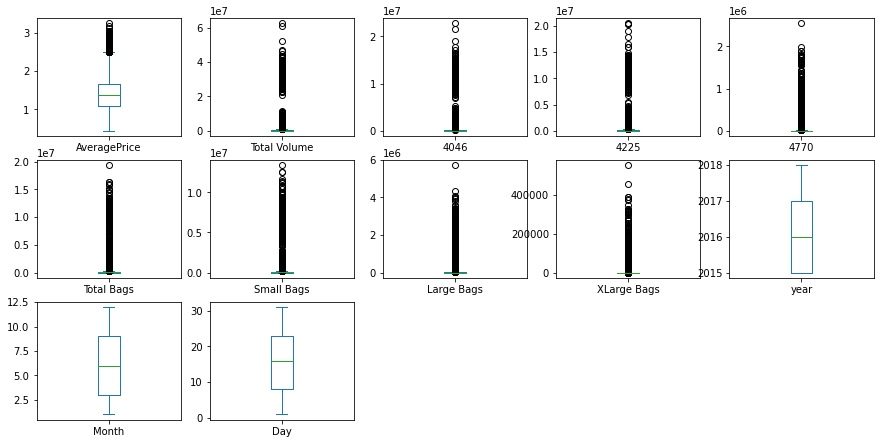

In [55]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))
plt.show()

##### We can see that Outliers are present in Average Price,Total Volumne ,4046 ,4225,4770,Total Bags ,Small Bags, large bags,xlarge bags ...

<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> CORRELATION <h2>

In [56]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


In [57]:
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
Day             0.027386
year            0.093197
Month           0.162409
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

<AxesSubplot:>

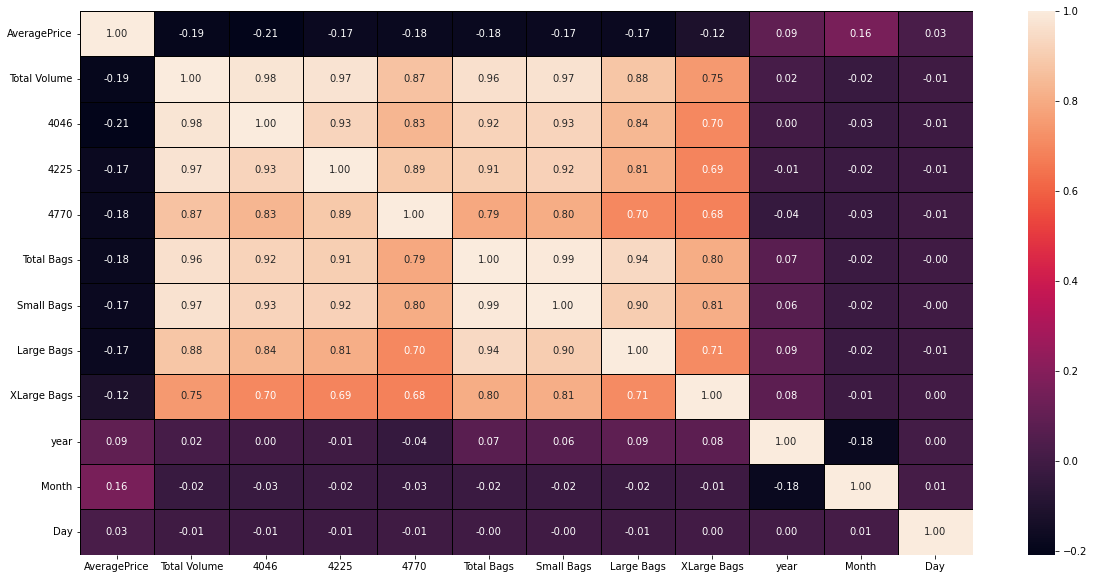

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')


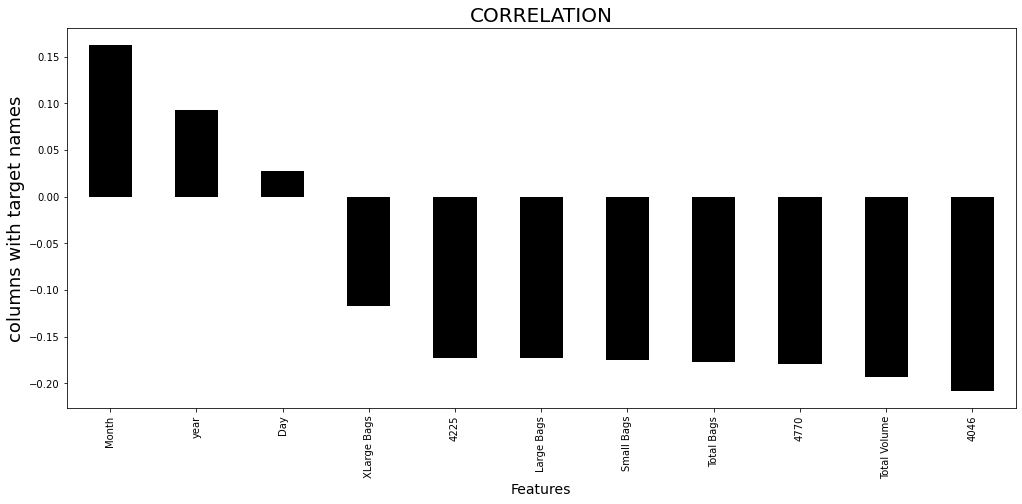

In [59]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

##### So features like year, day, region XLarge Bags have least relation with target so we are dropping these columns

In [60]:
df.drop("region",axis=1, inplace=True)
df.drop("Day",axis=1, inplace=True)
df.drop("XLarge Bags",axis=1, inplace=True)


In [61]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015,11


###### This is dataset after removing least correlated columns with target

<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> DESCRIPTIVE STATISTICS <h2>

In [62]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,2018.000000,12.000000


<AxesSubplot:>

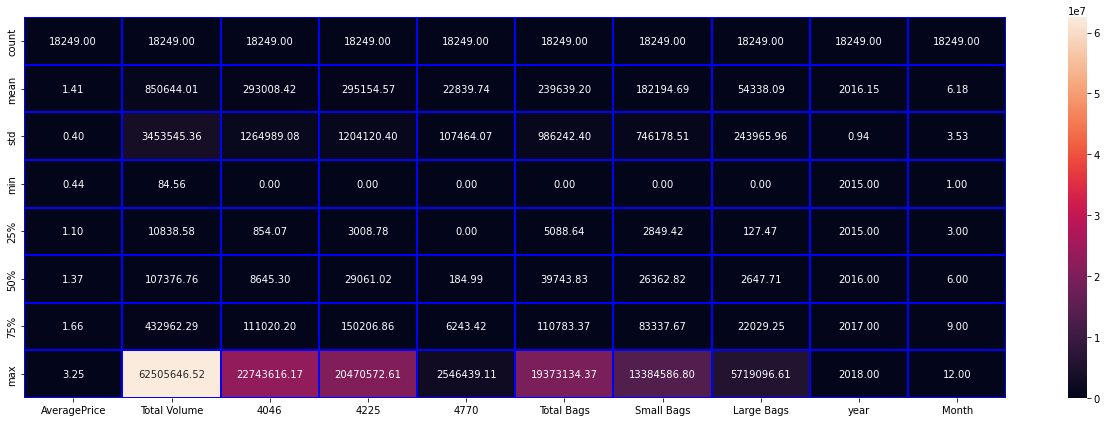

In [63]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f")

###### So we can see that all columns count are equal which means no misssing value in dataset... we can can outliers are also pesent in dataset which needs to be treated

<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> Now lets Check Outliers in the dataset <h2>

In [64]:
df.shape

(18249, 11)

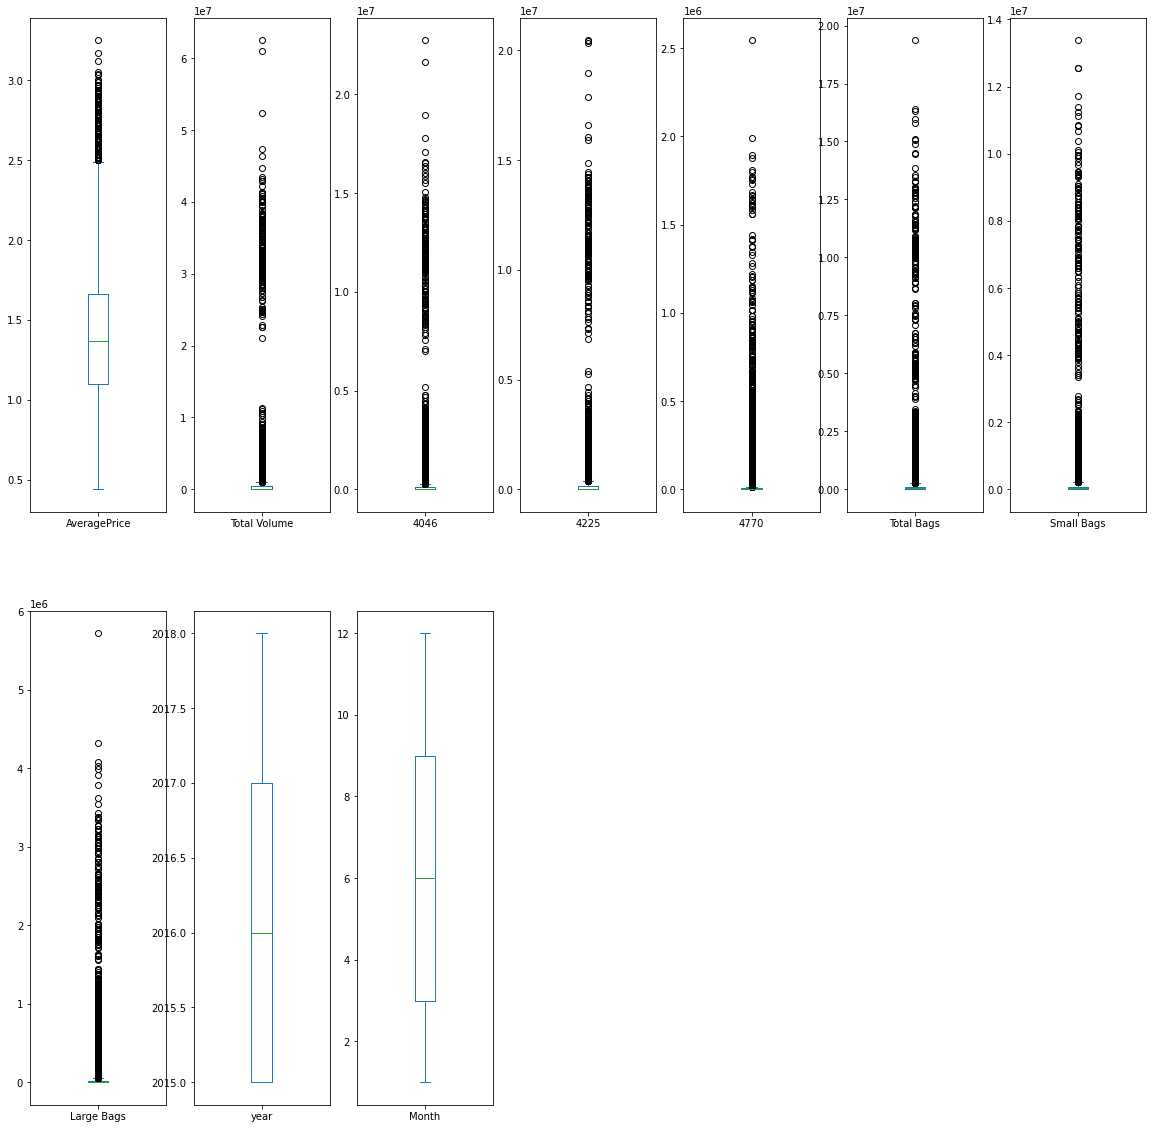

In [65]:
df.plot(kind='box',subplots=True,layout=(2,7),figsize=(20,20))
plt.show()
# Now lets subplot all the columns in the dataset by using Boxplot

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Before Treating Outliers Convert catagorical columns into int format* <h2>

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   type          18249 non-null  object 
 9   year          18249 non-null  int64  
 10  Month         18249 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB


In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['type']

for i in Input:
    df[i] = le.fit_transform(df[i])
    

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   type          18249 non-null  int32  
 9   year          18249 non-null  int64  
 10  Month         18249 non-null  int64  
dtypes: float64(8), int32(1), int64(2)
memory usage: 1.5 MB


In [70]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015,11


<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Remove Outliers Now* <h2>

# 1. ZScore Method

In [71]:
df.shape

(18249, 11)

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 4, ..., 0, 0, 0], dtype=int64))

In [73]:
df_new=df[(z<3).all(axis=1)]

In [74]:
df_new.shape

(17736, 11)

In [75]:
# Percentage of data loss

DataLoss=((18249-17651)/18249)*100
DataLoss

3.276891884486821

##### There is 3.276891884486821%  data loss in ZScore Method

# 2. IQR Method

In [76]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [77]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (18249, 11)

New DataFrame data in Rows and Column: (12756, 11)

Total Dropped rows: 5493


In [78]:
#Percentage Data Loss using IQR
data_loss1 = (18249-11538)/18249*100
data_loss1

36.774617787276014

##### There is 36.774617787276014% data loss in IQR Method

### we will go for zscore as there is less data loss

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> Check Skewness <h2>


In [79]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
type             0.000329
year             0.215339
Month            0.106617
dtype: float64

###### We can see that in column 4046,4225,4770,Small Bags,Large Bags,Total Volume skewness is present

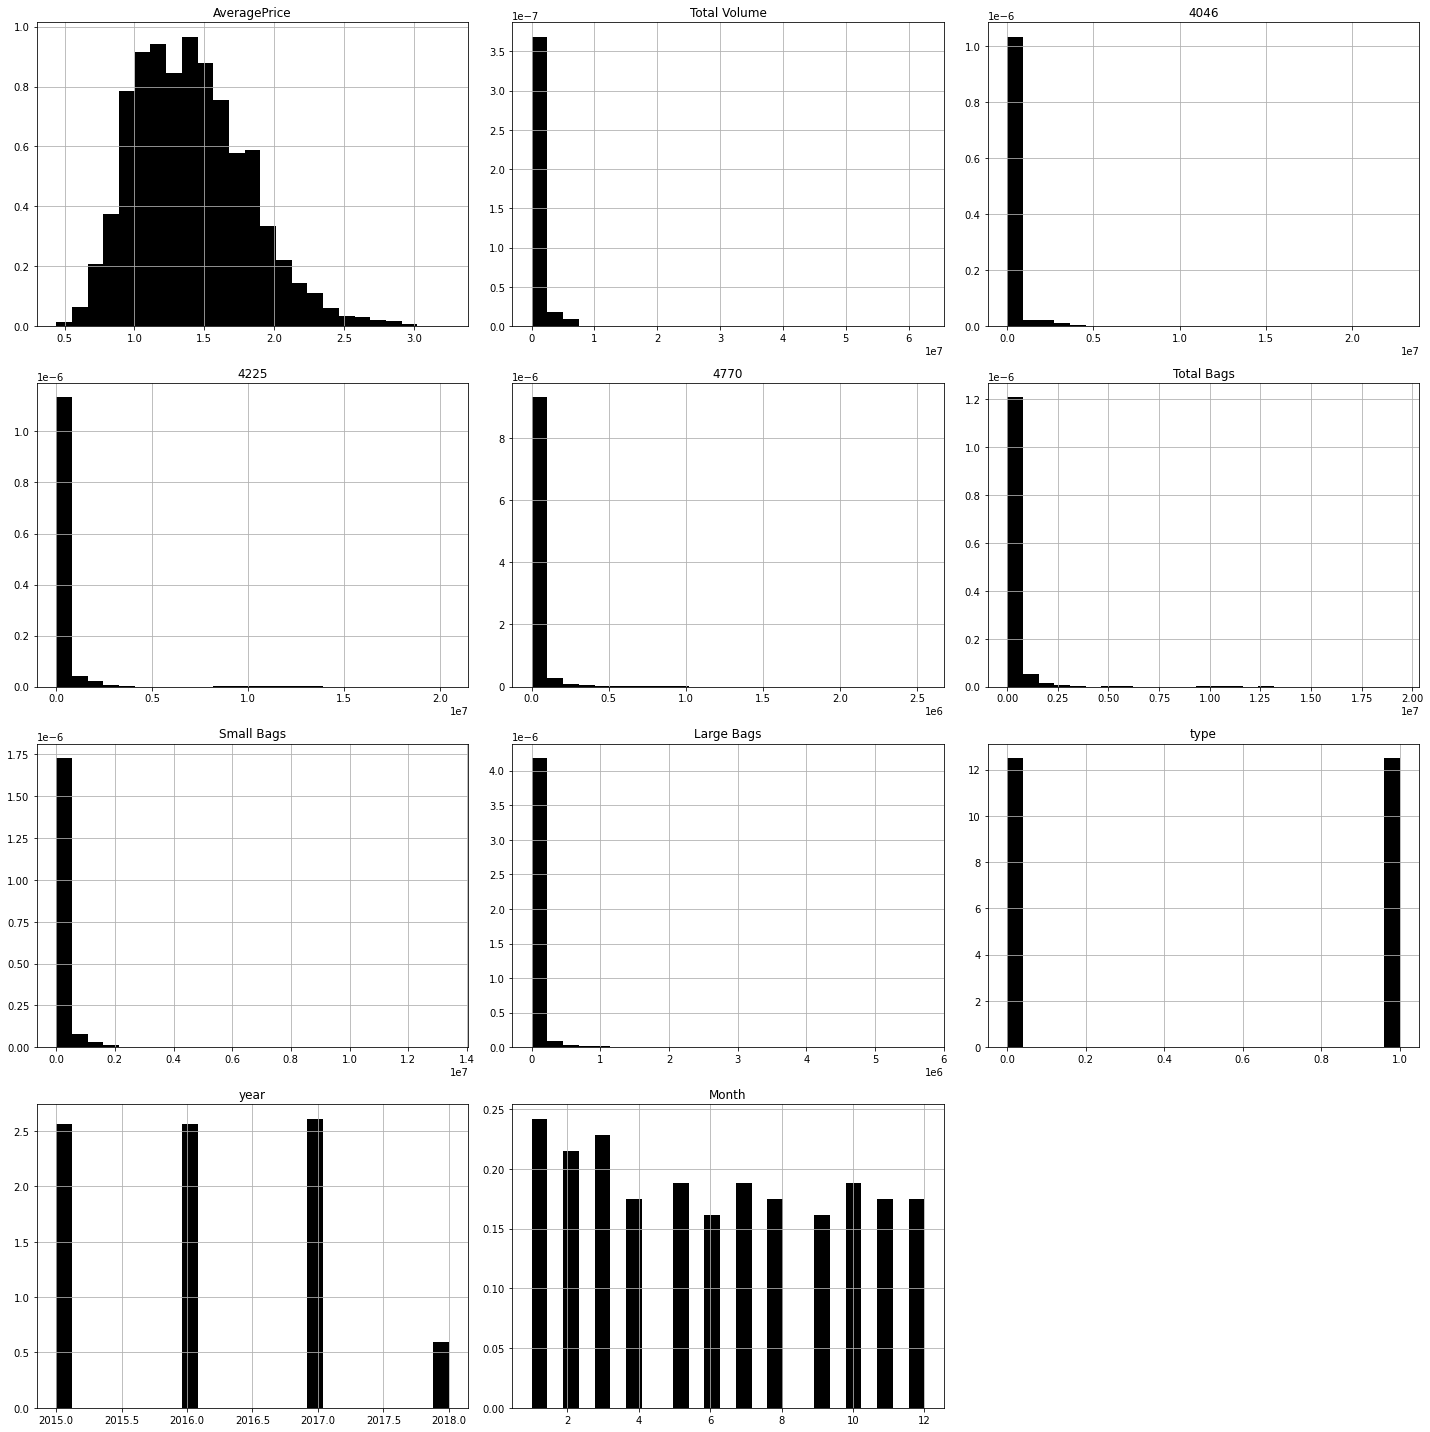

In [80]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='black',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

###### As skewness is present in some columns lets remove it

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Remove Skewness Now* <h2>

In [81]:
# Columns having skewness 

L1=["AveragePrice","4046","4225","4770","Small Bags","Large Bags","Total Volume"]

In [82]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [83]:
#Removing skewness using yeo-johnson
df_new[["AveragePrice","4046","4225","4770","Total Bags","Large Bags","Total Volume"]] = PT.fit_transform(df_new[["AveragePrice","4046","4225","4770","Small Bags","Large Bags","Total Volume"]].values)

In [84]:
#Checking skewness after removing skewness by power transform
df_new.skew()

AveragePrice    0.000733
Total Volume   -0.007418
4046           -0.038752
4225           -0.044355
4770            0.023088
Total Bags     -0.022020
Small Bags      4.217194
Large Bags     -0.110487
type           -0.027971
year            0.225579
Month           0.108777
dtype: float64

##### We can see that the skewness has been removed from the given columns "AveragePrice","4046","4225","4770","Total Bags","Large Bags","Total Volume "..

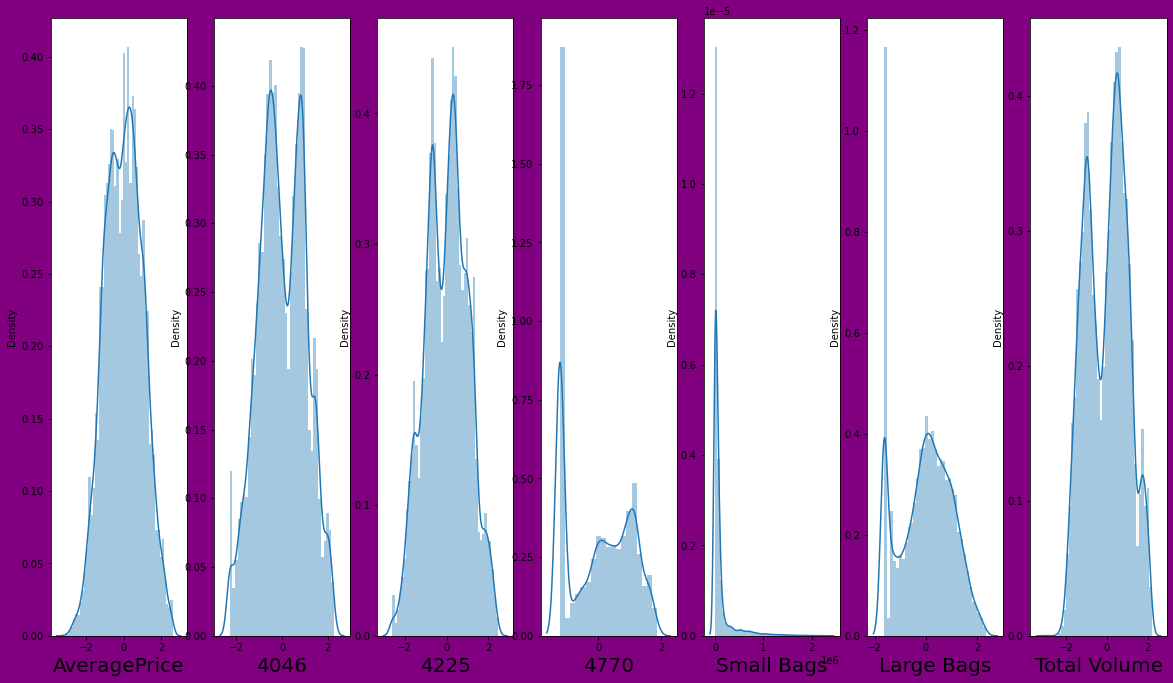

In [85]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='purple')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### We can see all column has been normalised

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Split the dataset into dependent and independent variable* <h2>

In [86]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month
0,-0.114588,-0.082125,-0.661342,0.341682,-0.230284,-0.351015,8603.62,-0.785026,0,2015,12
1,-0.061026,-0.153857,-0.780622,0.260348,-0.183133,-0.315195,9408.07,-0.775093,0,2015,12
2,-1.298422,0.196850,-0.735395,0.637321,0.015261,-0.377845,8042.21,-0.762445,0,2015,12
3,-0.827171,0.012244,-0.636619,0.458186,-0.129287,-0.513452,5677.40,-0.703173,0,2015,12
4,-0.250592,-0.186838,-0.688313,0.253013,-0.118655,-0.493126,5986.26,-0.611277,0,2015,11


In [87]:
#Independent Variable
y=df.iloc[:,0]

#Dependent Variable 
x=df.iloc[:,1:]

In [88]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015,12
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015,11
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,1,2018,2
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,1,2018,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,1,2018,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,1,2018,1


<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets scale the data using Standard scaler* <h2>

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.999836,-1.221282,1.647632
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.999836,-1.221282,1.647632
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.999836,-1.221282,1.647632
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.999836,-1.221282,1.647632
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.999836,-1.221282,1.364669
...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,1.000164,1.970504,-1.181997
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,1.000164,1.970504,-1.464959
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,1.000164,1.970504,-1.464959
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,1.000164,1.970504,-1.464959


<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Check Whether Multicollinearity is present in the dataset or not ?* <h2>

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [93]:
vif_cal()

     VIF FACTOR      FEATURES
0  4.925776e+09  Total Volume
1  6.608678e+08          4046
2  5.988005e+08          4225
3  4.769589e+06          4770
4  4.015599e+08    Total Bags
5  6.471780e+03    Small Bags
6  6.462577e+02    Large Bags
7  1.060186e+00          type
8  1.084188e+00          year
9  1.036935e+00         Month


###### So features do not have VIF above 10 so we will not drop feature 

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets Train and Test the model using Regression Models* <h2>

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [95]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.4359623967389199
At random state 0,the testing accuracy is :- 0.44704387458468253



At random state 1,the training accuracy is :- 0.4375012323278459
At random state 1,the testing accuracy is :- 0.44151946874624126



At random state 2,the training accuracy is :- 0.44236503753499123
At random state 2,the testing accuracy is :- 0.42146933456524827



At random state 3,the training accuracy is :- 0.43901967787390617
At random state 3,the testing accuracy is :- 0.4352650473880173



At random state 4,the training accuracy is :- 0.4416865934527896
At random state 4,the testing accuracy is :- 0.4246280447798222



At random state 5,the training accuracy is :- 0.4378429627004664
At random state 5,the testing accuracy is :- 0.43910388877816453



At random state 6,the training accuracy is :- 0.4370542251909151
At random state 6,the testing accuracy is :- 0.4432108638919058



At random state 7,the training accuracy is :- 0.4387825166854292
At ra

At random state 70,the testing accuracy is :- 0.4432605390315132



At random state 71,the training accuracy is :- 0.43574213574701504
At random state 71,the testing accuracy is :- 0.44836794594827134



At random state 72,the training accuracy is :- 0.4414799080296281
At random state 72,the testing accuracy is :- 0.4254671907415605



At random state 73,the training accuracy is :- 0.43793088718521866
At random state 73,the testing accuracy is :- 0.43967856043716014



At random state 74,the training accuracy is :- 0.4369086266974572
At random state 74,the testing accuracy is :- 0.44393157718385035



At random state 75,the training accuracy is :- 0.442615965894365
At random state 75,the testing accuracy is :- 0.4212240524144687



At random state 76,the training accuracy is :- 0.43524693616263643
At random state 76,the testing accuracy is :- 0.4501974964640598



At random state 77,the training accuracy is :- 0.43423236350971606
At random state 77,the testing accuracy is :- 0.45300180

###### we are taking random state as 3 because there is least difference between training and accuracy

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [97]:
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
pred_test=lr.predict(x_test)

In [99]:
print (r2_score(y_test,pred_test))

0.4352650473880173


###### So linear regression is not working well and is giving only 44%

In [100]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.22953688619504323
Mean Squared Error :-> 0.08843759387698141
Root Mean Squared Error :-> 0.2973845891719701


## Cross Validation on Linear Regression

In [101]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,16):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -7077.417772190402 and accuracy score for training is -0.4555885822097072 and accuracy for testing is 0.4352650473880173



At cross fold 3 the cv score is -14.07559982491344 and accuracy score for training is -0.4555885822097072 and accuracy for testing is 0.4352650473880173



At cross fold 4 the cv score is -12.773227007967225 and accuracy score for training is -0.4555885822097072 and accuracy for testing is 0.4352650473880173



At cross fold 5 the cv score is -11.756425776886859 and accuracy score for training is -0.4555885822097072 and accuracy for testing is 0.4352650473880173



At cross fold 6 the cv score is -1.102134572098125 and accuracy score for training is -0.4555885822097072 and accuracy for testing is 0.4352650473880173



At cross fold 7 the cv score is 0.035346101098482165 and accuracy score for training is -0.4555885822097072 and accuracy for testing is 0.4352650473880173



At cross fold 8 the cv score is -0.0321967089795189 and accu

###### Not even cv is performing good takind cv=9

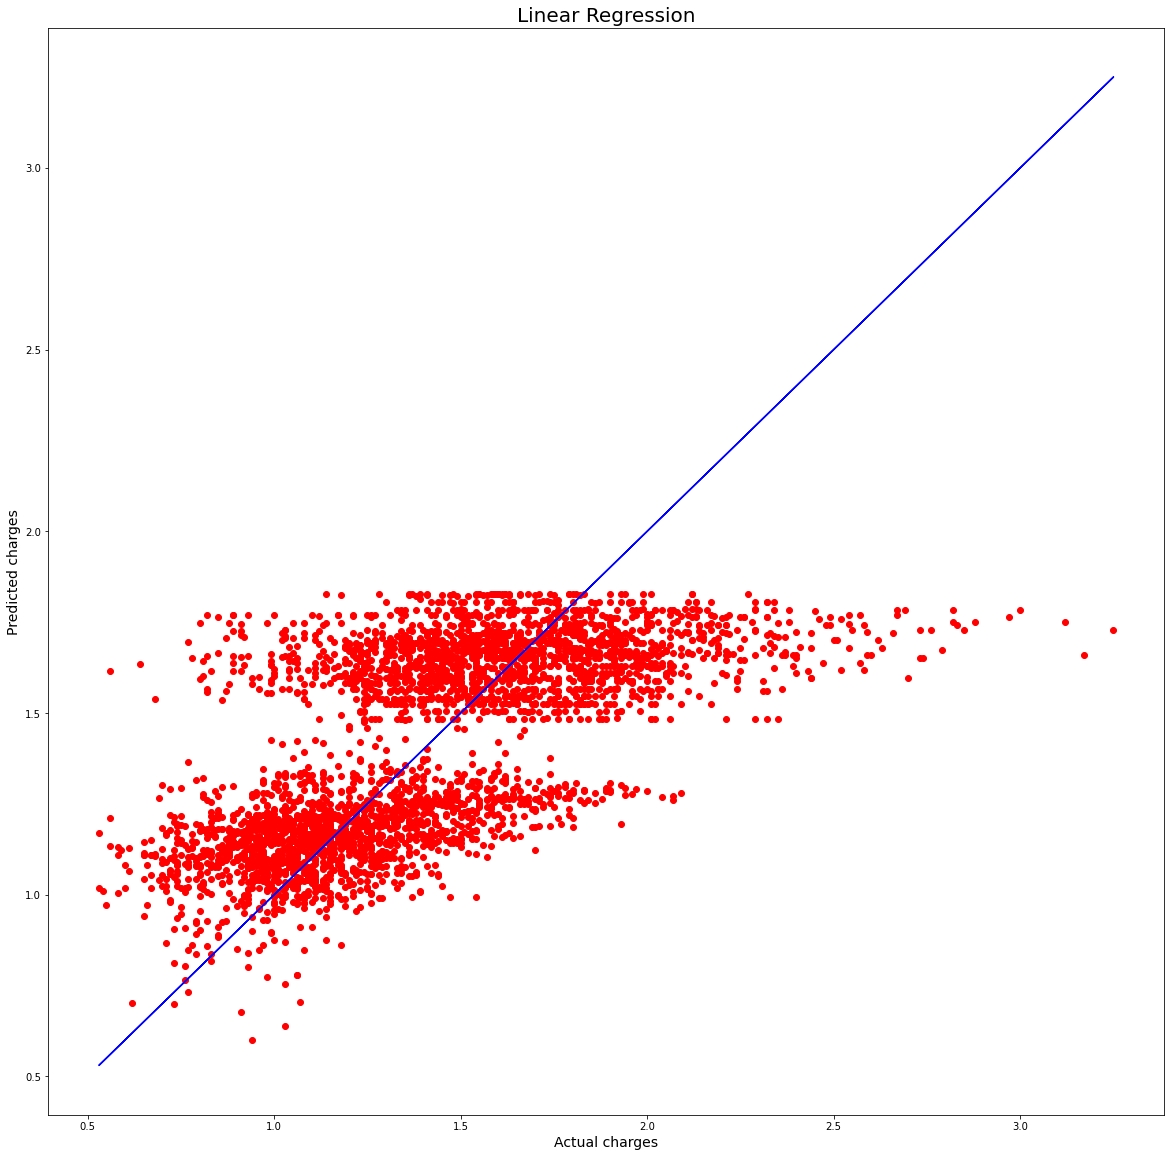

In [102]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

##### So model is not learning well and most of the data is away from best fit line

# Decision Tree Regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
dt=DecisionTreeRegressor()

In [105]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 1.0
At random state 0,the testing accuracy is :- 0.7115049169806779



At random state 1,the training accuracy is :- 1.0
At random state 1,the testing accuracy is :- 0.7429554753810899



At random state 2,the training accuracy is :- 1.0
At random state 2,the testing accuracy is :- 0.7007608191975871



At random state 3,the training accuracy is :- 1.0
At random state 3,the testing accuracy is :- 0.7351349248550147



At random state 4,the training accuracy is :- 1.0
At random state 4,the testing accuracy is :- 0.7298319633236804



At random state 5,the training accuracy is :- 1.0
At random state 5,the testing accuracy is :- 0.7366294807769094



At random state 6,the training accuracy is :- 1.0
At random state 6,the testing accuracy is :- 0.7474071336087434



At random state 7,the training accuracy is :- 1.0
At random state 7,the testing accuracy is :- 0.7333231766202355



At random state 8,the training accuracy is :- 1.0
At random stat

At random state 70,the training accuracy is :- 1.0
At random state 70,the testing accuracy is :- 0.722488580425634



At random state 71,the training accuracy is :- 1.0
At random state 71,the testing accuracy is :- 0.7075666585647726



At random state 72,the training accuracy is :- 1.0
At random state 72,the testing accuracy is :- 0.7480545194561614



At random state 73,the training accuracy is :- 1.0
At random state 73,the testing accuracy is :- 0.7384108784326526



At random state 74,the training accuracy is :- 1.0
At random state 74,the testing accuracy is :- 0.7391217282380865



At random state 75,the training accuracy is :- 1.0
At random state 75,the testing accuracy is :- 0.7195916218834786



At random state 76,the training accuracy is :- 1.0
At random state 76,the testing accuracy is :- 0.7276329670243331



At random state 77,the training accuracy is :- 1.0
At random state 77,the testing accuracy is :- 0.7471510195654716



At random state 78,the training accuracy is :- 1.

##### We are taking random state=6 as it has least diiference in training and accuracy

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [115]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [116]:
pred_test=dt.predict(x_test)

In [117]:
print(r2_score(y_test,pred_test))

0.7592288623179194


##### So we are getting 76% r2_score which is better than linear regression

In [110]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,16):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -2.2150967246447992 and accuracy score for training is -0.9919117769003944 and accuracy for testing is 0.7410006494883659



At cross fold 3 the cv score is -0.4793457568481741 and accuracy score for training is -0.9919117769003944 and accuracy for testing is 0.7410006494883659



At cross fold 4 the cv score is -0.592183426935023 and accuracy score for training is -0.9919117769003944 and accuracy for testing is 0.7410006494883659



At cross fold 5 the cv score is -0.2624034350060332 and accuracy score for training is -0.9919117769003944 and accuracy for testing is 0.7410006494883659



At cross fold 6 the cv score is -0.4029804813738991 and accuracy score for training is -0.9919117769003944 and accuracy for testing is 0.7410006494883659



At cross fold 7 the cv score is -0.11987311153277902 and accuracy score for training is -0.9919117769003944 and accuracy for testing is 0.7410006494883659



At cross fold 8 the cv score is -0.24295496118643822 and a

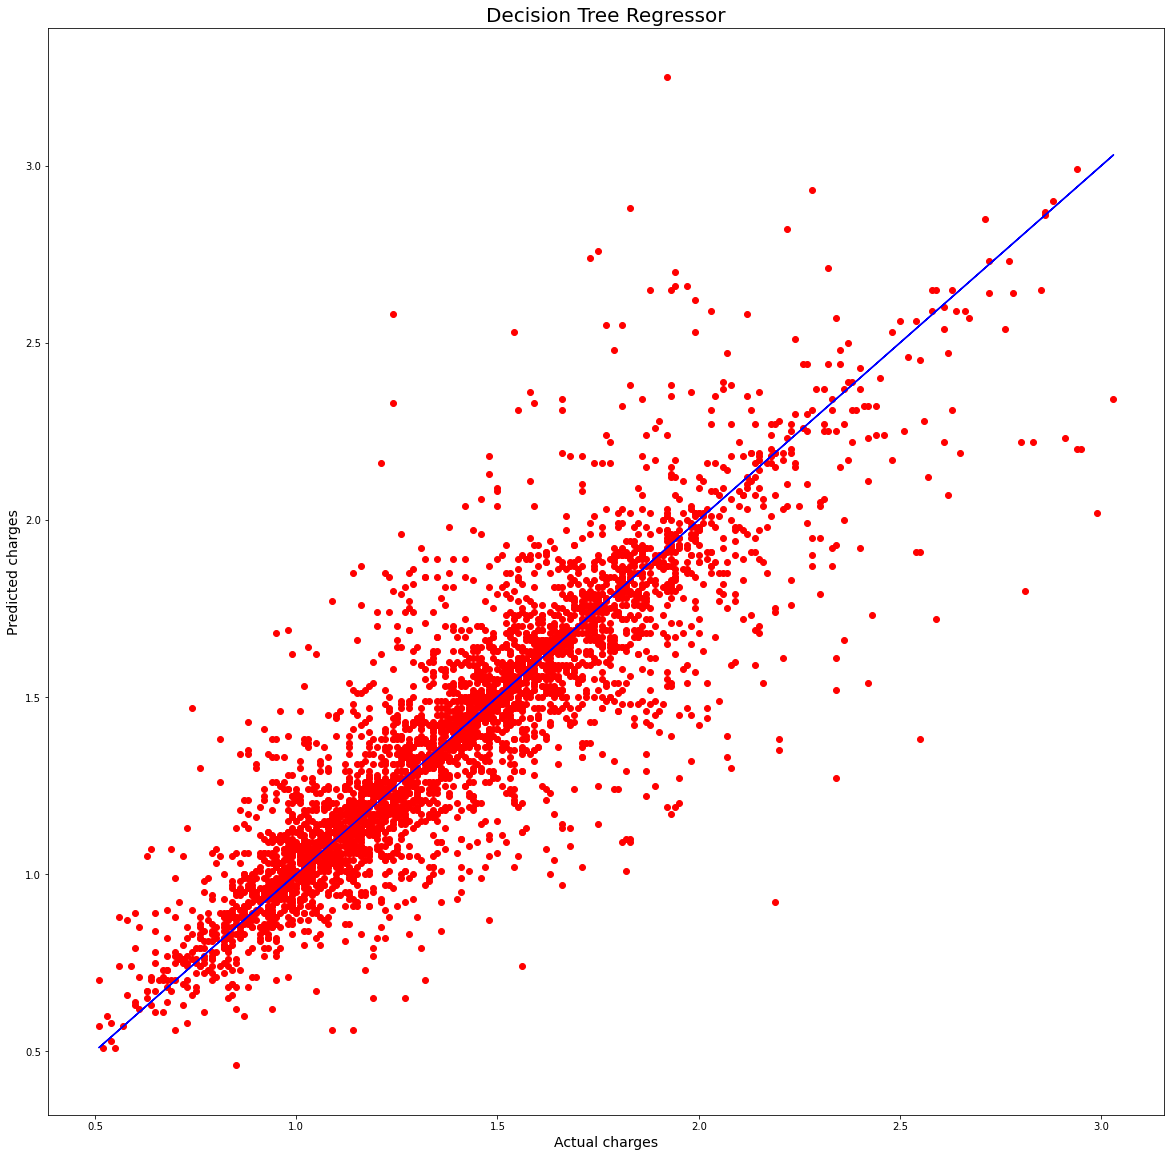

In [111]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Decision Tree Regressor' , fontsize=20)
plt. show()

##### WE can see that the data's are scattered on the best fit line and it works much better than Linear Regression

## KNN Regressor

In [112]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [113]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.8669519510063091
At random state 0,the testing accuracy is :- 0.7784383490039758



At random state 1,the training accuracy is :- 0.8652556237674295
At random state 1,the testing accuracy is :- 0.7900397228143197



At random state 2,the training accuracy is :- 0.8652118883614421
At random state 2,the testing accuracy is :- 0.7759362597758424



At random state 3,the training accuracy is :- 0.8671066604261046
At random state 3,the testing accuracy is :- 0.7652836056510764



At random state 4,the training accuracy is :- 0.8684120629218106
At random state 4,the testing accuracy is :- 0.7634794309279511



At random state 5,the training accuracy is :- 0.8645259012670372
At random state 5,the testing accuracy is :- 0.7922997924867738



At random state 6,the training accuracy is :- 0.8632755034693178
At random state 6,the testing accuracy is :- 0.7931116567558902



At random state 7,the training accuracy is :- 0.8654491760319172
At random s

At random state 62,the training accuracy is :- 0.8647213203817591
At random state 62,the testing accuracy is :- 0.7877028945162052



At random state 63,the training accuracy is :- 0.8637255652415039
At random state 63,the testing accuracy is :- 0.7868200885482763



At random state 64,the training accuracy is :- 0.8691213491098615
At random state 64,the testing accuracy is :- 0.7637752963648856



At random state 65,the training accuracy is :- 0.8695738587542657
At random state 65,the testing accuracy is :- 0.7660846499098998



At random state 66,the training accuracy is :- 0.8668336056674392
At random state 66,the testing accuracy is :- 0.7852861313512398



At random state 67,the training accuracy is :- 0.8653656436152226
At random state 67,the testing accuracy is :- 0.7844764739899237



At random state 68,the training accuracy is :- 0.8665145447532754
At random state 68,the testing accuracy is :- 0.7811155635271552



At random state 69,the training accuracy is :- 0.8646147751395

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=53)


In [119]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [120]:
pred_test=knn.predict(x_test)

In [121]:
print (r2_score(y_test,pred_test))

0.7914593403933735


##### r2_score is 79% 

In [124]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.1303676712328767
Mean Squared Error :-> 0.03376576547945205
Root Mean Squared Error :-> 0.18375463389926266


In [125]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -1.3535484584002093 and accuracy score for training is -0.823127523358504 and accuracy for testing is 0.7914593403933735



At cross fold 3 the cv score is -0.4975051421846059 and accuracy score for training is -0.823127523358504 and accuracy for testing is 0.7914593403933735



At cross fold 4 the cv score is -0.2153607192717562 and accuracy score for training is -0.823127523358504 and accuracy for testing is 0.7914593403933735



At cross fold 5 the cv score is -0.024489592104338966 and accuracy score for training is -0.823127523358504 and accuracy for testing is 0.7914593403933735



At cross fold 6 the cv score is -0.0757543258740055 and accuracy score for training is -0.823127523358504 and accuracy for testing is 0.7914593403933735



At cross fold 7 the cv score is 0.17617914761321732 and accuracy score for training is -0.823127523358504 and accuracy for testing is 0.7914593403933735



At cross fold 8 the cv score is 0.18463119334095784 and accura

##### We are taking cv=9 as it has least difference between r2_score and cv score

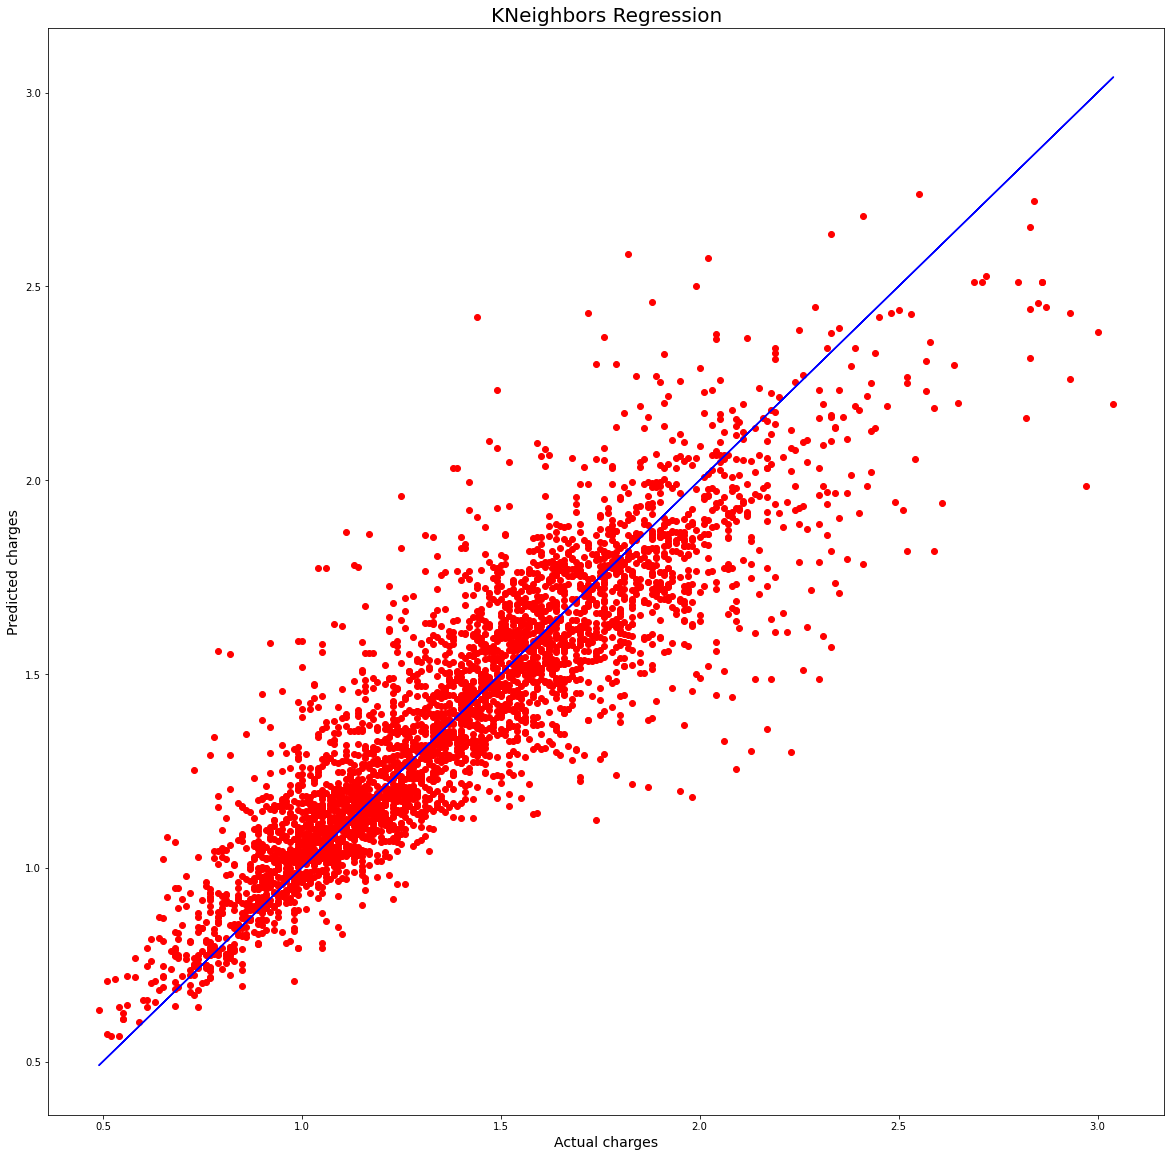

In [126]:
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('KNeighbors Regression' , fontsize=20)
plt. show()

# Ensemble Technique

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
# Bagging Technique (Parallel)
rf=RandomForestRegressor()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.9821408332319976
At random state 0,the testing accuracy is :- 0.8697264120340912



At random state 1,the training accuracy is :- 0.9820204326427673
At random state 1,the testing accuracy is :- 0.878121310352735



At random state 2,the training accuracy is :- 0.982876850633881
At random state 2,the testing accuracy is :- 0.8657335801228658



At random state 3,the training accuracy is :- 0.9824444515251901
At random state 3,the testing accuracy is :- 0.8746145048911245



At random state 4,the training accuracy is :- 0.982156952023208
At random state 4,the testing accuracy is :- 0.8658731859633334



At random state 5,the training accuracy is :- 0.9822557742636301
At random state 5,the testing accuracy is :- 0.8691089857816972



At random state 6,the training accuracy is :- 0.9820400581757862
At random state 6,the testing accuracy is :- 0.8809684994265012



At random state 7,the training accuracy is :- 0.982214399783511
At random state

At random state 62,the training accuracy is :- 0.9821469800167901
At random state 62,the testing accuracy is :- 0.8767972761046605



At random state 63,the training accuracy is :- 0.9818894107737979
At random state 63,the testing accuracy is :- 0.87241687579582



At random state 64,the training accuracy is :- 0.9823933783057684
At random state 64,the testing accuracy is :- 0.8705585475997801



At random state 65,the training accuracy is :- 0.9824981488164456
At random state 65,the testing accuracy is :- 0.8613251043872179



At random state 66,the training accuracy is :- 0.982310841901642
At random state 66,the testing accuracy is :- 0.8715183974689515



At random state 67,the training accuracy is :- 0.9819855245755285
At random state 67,the testing accuracy is :- 0.8643104240831421



At random state 68,the training accuracy is :- 0.9822536144540441
At random state 68,the testing accuracy is :- 0.876804976407432



At random state 69,the training accuracy is :- 0.9820540843753746


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [98]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
pred_test=rf.predict(x_test)

In [100]:
print (r2_score(y_test,pred_test))

0.8842972912621107


##### 88% is r2 in random forest which very good and the best from the rest model

In [101]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.09799087671232877
Mean Squared Error :-> 0.01964068639726027
Root Mean Squared Error :-> 0.14014523323060357


In [102]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -1.586966931629794 and accuracy score for training is -0.9324249141176932 and accuracy for testing is 0.8842972912621107



At cross fold 3 the cv score is -0.05120350291760919 and accuracy score for training is -0.9324249141176932 and accuracy for testing is 0.8842972912621107



At cross fold 4 the cv score is 0.009574508534385295 and accuracy score for training is -0.9324249141176932 and accuracy for testing is 0.8842972912621107



At cross fold 5 the cv score is 0.20423955442006014 and accuracy score for training is -0.9324249141176932 and accuracy for testing is 0.8842972912621107



At cross fold 6 the cv score is 0.10674282505792605 and accuracy score for training is -0.9324249141176932 and accuracy for testing is 0.8842972912621107



At cross fold 7 the cv score is 0.30387323281683604 and accuracy score for training is -0.9324249141176932 and accuracy for testing is 0.8842972912621107



At cross fold 8 the cv score is 0.28938424057759093 and a

##### We are taking cv=9 as its it best in all withless difference from r2_score

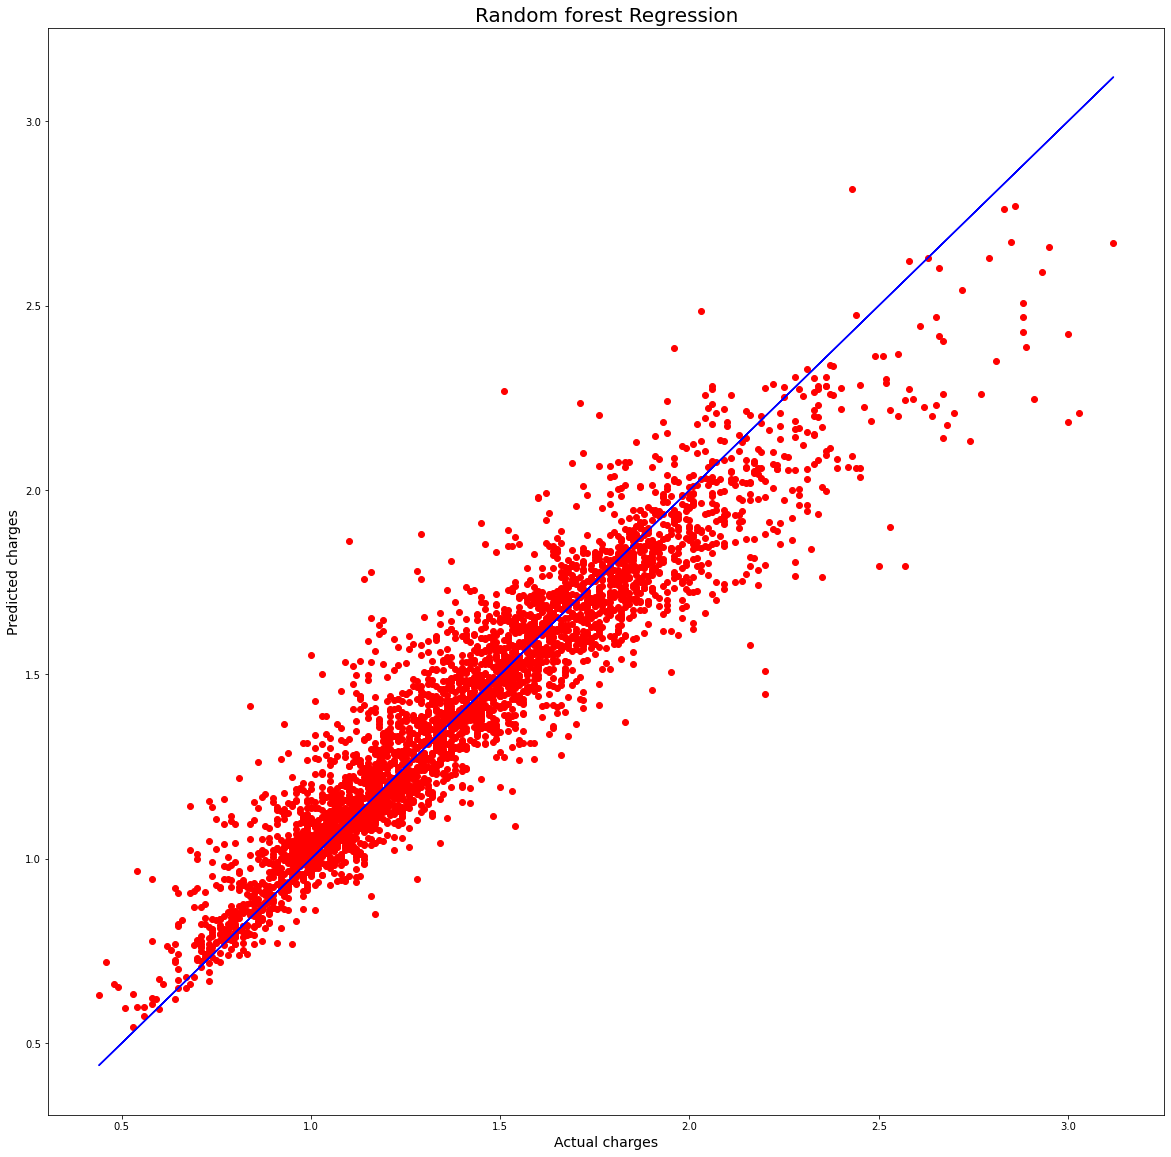

In [103]:
plt.scatter (x=y_test,y=pred_test,color='r')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Random forest Regression' , fontsize=20)
plt. show()

##### Most of the data are near best fit line and some are scattered

In [95]:
from sklearn.svm import SVR

In [97]:
svr=SVR()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    svr.fit(x_train,y_train)
    pred_train=svr.predict(x_train)
    pred_test=svr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.5864987277072731
At random state 0,the testing accuracy is :- 0.5844009211419513



At random state 1,the training accuracy is :- 0.5843872803792411
At random state 1,the testing accuracy is :- 0.5932763653673551



At random state 2,the training accuracy is :- 0.5924234027178525
At random state 2,the testing accuracy is :- 0.5592796880330786



At random state 3,the training accuracy is :- 0.5900545288427441
At random state 3,the testing accuracy is :- 0.5746434511161749



At random state 4,the training accuracy is :- 0.5916023774619259
At random state 4,the testing accuracy is :- 0.5681694416619189



At random state 5,the training accuracy is :- 0.5854528063197222
At random state 5,the testing accuracy is :- 0.5794405463841383



At random state 6,the training accuracy is :- 0.5869920944562699
At random state 6,the testing accuracy is :- 0.5763415964453091



At random state 7,the training accuracy is :- 0.5867383554225749
At random s

At random state 62,the training accuracy is :- 0.5828084653524578
At random state 62,the testing accuracy is :- 0.5952204486537476



At random state 63,the training accuracy is :- 0.5862850438884931
At random state 63,the testing accuracy is :- 0.5849314372874903



At random state 64,the training accuracy is :- 0.5874256329029304
At random state 64,the testing accuracy is :- 0.5734112363870376



At random state 65,the training accuracy is :- 0.5865954915823197
At random state 65,the testing accuracy is :- 0.5812787965516376



At random state 66,the training accuracy is :- 0.5839382278670244
At random state 66,the testing accuracy is :- 0.5946468748508085



At random state 67,the training accuracy is :- 0.5874090242799417
At random state 67,the testing accuracy is :- 0.5787731160189091



At random state 68,the training accuracy is :- 0.5836302874620366
At random state 68,the testing accuracy is :- 0.5908621110963479



At random state 69,the training accuracy is :- 0.5817047218884

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [99]:
svr.fit(x_train,y_train)

SVR()

In [101]:
pred_test=svr.predict(x_test)

In [102]:
print (r2_score(y_test,pred_test))

0.5860049133732101


##### 59% is r2 in SVR

In [103]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))
print (' **ERROR** ')

 **ERROR** 
Mean Absolute Error :-> 0.18660878018017527
Mean Squared Error :-> 0.06377033685714067
Root Mean Squared Error :-> 0.25252789322595764
 **ERROR** 


In [104]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
    cv_score=cross_val_score(svr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print (f"At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print ("\n\n")

At cross fold 2 the cv score is -2.7990122289953363 and accuracy score for training is -0.5502352502013006 and accuracy for testing is 0.5860049133732101



At cross fold 3 the cv score is -0.33997930433632223 and accuracy score for training is -0.5502352502013006 and accuracy for testing is 0.5860049133732101



At cross fold 4 the cv score is -0.07026808893406958 and accuracy score for training is -0.5502352502013006 and accuracy for testing is 0.5860049133732101



At cross fold 5 the cv score is 0.12294750994940506 and accuracy score for training is -0.5502352502013006 and accuracy for testing is 0.5860049133732101



At cross fold 6 the cv score is -0.12974445759516853 and accuracy score for training is -0.5502352502013006 and accuracy for testing is 0.5860049133732101



At cross fold 7 the cv score is 0.24614361713605742 and accuracy score for training is -0.5502352502013006 and accuracy for testing is 0.5860049133732101



At cross fold 8 the cv score is 0.23516499325963225 and

###### taking cv=9

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> *Now Lets consider model which Model should we go for as a final model* <h2>

In [105]:
mm=pd.DataFrame([["Linear Regression","44%"],["Decision Tree Regressor","76%"],["KNeighbors Regressor","79%"],["Random Forest Regressor","88%"],["SVR","59%"]],
                    columns=["Model_Name","R2_SCORE"])

mm

,Model_Name,R2_SCORE
0,Linear Regression,44%
1,Decision Tree Regressor,76%
2,KNeighbors Regressor,79%
3,Random Forest Regressor,88%
4,SVR,59%


##### We are going with rf because it has best r2_score

# Hyper Parameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [106]:
parameter={'criterion' :['mse','mae'],
          'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)


print (clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


#### Not using more parameter as it was taking a lot of time to run

In [107]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision= rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print ('R2 Score :',rfs*100)



R2 Score : 87.79531277635108


##### Not doing cv as it is taking a lot of time

# Now Save the Model

In [108]:
#Saving the model using .pkl
import joblib
joblib.dump(rf,"Avocadoreport.pkl")

['Avocadoreport.pkl']

# Prediction

In [112]:
#Loading the saved model
aa=joblib.load("Avocadoreport.pkl")


In [113]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([1.7223, 1.7467, 1.8236, ..., 1.6972, 1.3017, 1.8262])

In [114]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
Predicted,1.7223,1.7467,1.8236,1.8428,0.7666,1.8687,1.0375,0.7972,1.2161,1.1656,...,1.936,1.3035,1.7965,2.0006,1.9828,1.7075,1.2227,1.6972,1.3017,1.8262
Original,1.4100,1.7300,1.8200,1.9000,0.7100,1.6600,1.1100,0.8100,1.2600,1.0300,...,1.800,1.0800,1.9700,2.3100,1.9600,1.7400,1.3700,1.6400,1.3700,1.8100


# It is making a good Prediction and the difference between Original and Predicted is not much

# ---------------------------------------------------

# Regression project is completed here

# ---------------------------------------------------------------

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> * Now Let do Classification * <h2>

# I am taking type as classification target variable

## We have already done with Eveything to process the data Now Lets split the x and y according to classification type

In [115]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month
0,-0.114588,-0.082125,-0.661342,0.341682,-0.230284,-0.351015,8603.62,-0.785026,0,2015,12
1,-0.061026,-0.153857,-0.780622,0.260348,-0.183133,-0.315195,9408.07,-0.775093,0,2015,12
2,-1.298422,0.196850,-0.735395,0.637321,0.015261,-0.377845,8042.21,-0.762445,0,2015,12
3,-0.827171,0.012244,-0.636619,0.458186,-0.129287,-0.513452,5677.40,-0.703173,0,2015,12
4,-0.250592,-0.186838,-0.688313,0.253013,-0.118655,-0.493126,5986.26,-0.611277,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.643117,-0.681948,-0.466869,-0.928891,-1.231409,-0.180765,13066.82,-0.417082,1,2018,2
18245,0.830150,-0.774712,-0.622108,-0.674433,-1.231409,-0.335683,8940.04,-0.489510,1,2018,1
18246,1.187729,-0.778646,-0.622056,-0.782288,0.435762,-0.317609,9351.80,-0.954257,1,2018,1
18247,1.316552,-0.705440,-0.551415,-0.720014,0.435451,-0.254775,10919.54,-0.919655,1,2018,1


In [116]:
x=df.loc [:,df.columns != 'type']

In [117]:
y=df.loc[:,'type']

In [118]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2015,11
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,2018,1


## Lets first check is our target variable is balanced or not 

<AxesSubplot:xlabel='type', ylabel='count'>

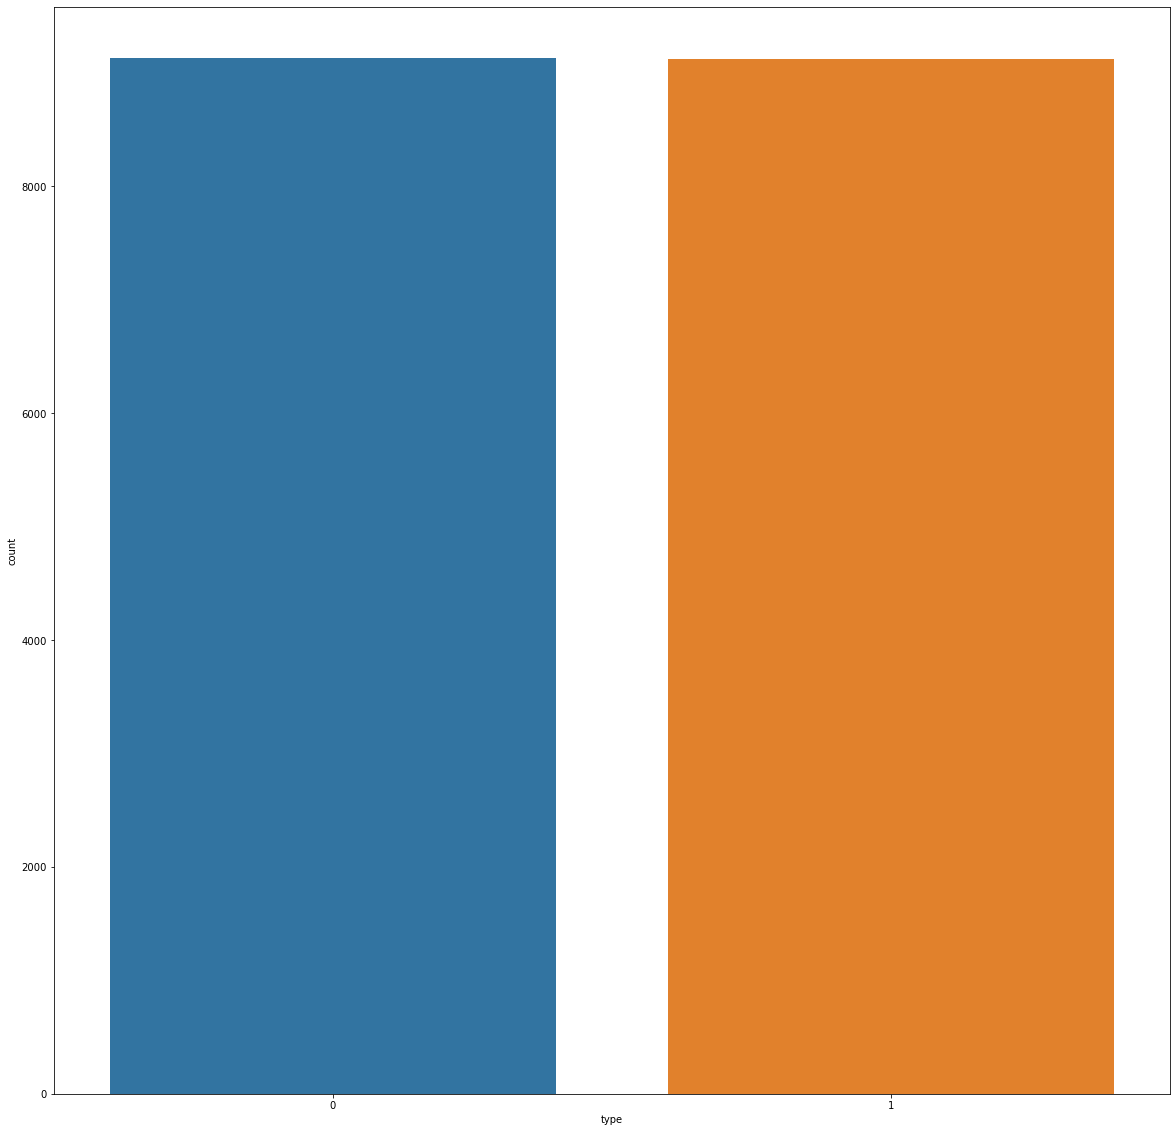

In [121]:
sns.countplot(y)

In [123]:
y.value_counts()

0    9126
1    9123
Name: type, dtype: int64

### So our target variable is balanced with only 3 unit difference

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

# Logistic Regression

In [125]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  15  The model performs very well
At random_state:- 15
Training accuaracy_score is :- 93.4
Testing accuracy_score is:- 93.4 


At random state  53  The model performs very well
At random_state:- 53
Training accuaracy_score is :- 93.3
Testing accuracy_score is:- 93.3 


At random state  55  The model performs very well
At random_state:- 55
Training accuaracy_score is :- 93.3
Testing accuracy_score is:- 93.3 


At random state  58  The model performs very well
At random_state:- 58
Training accuaracy_score is :- 93.2
Testing accuracy_score is:- 93.2 


At random state  60  The model performs very well
At random_state:- 60
Training accuaracy_score is :- 93.1
Testing accuracy_score is:- 93.1 


At random state  70  The model performs very well
At random_state:- 70
Training accuaracy_score is :- 93.4
Testing accuracy_score is:- 93.4 


At random state  125  The model performs very well
At random_state:- 125
Training accuaracy_score is :- 93.2
Testing accuracy_score is:- 93.2 

At random state  776  The model performs very well
At random_state:- 776
Training accuaracy_score is :- 93.4
Testing accuracy_score is:- 93.4 


At random state  781  The model performs very well
At random_state:- 781
Training accuaracy_score is :- 93.5
Testing accuracy_score is:- 93.5 


At random state  808  The model performs very well
At random_state:- 808
Training accuaracy_score is :- 93.4
Testing accuracy_score is:- 93.4 


At random state  812  The model performs very well
At random_state:- 812
Training accuaracy_score is :- 93.3
Testing accuracy_score is:- 93.3 


At random state  813  The model performs very well
At random_state:- 813
Training accuaracy_score is :- 93.4
Testing accuracy_score is:- 93.4 


At random state  814  The model performs very well
At random_state:- 814
Training accuaracy_score is :- 93.2
Testing accuracy_score is:- 93.2 


At random state  831  The model performs very well
At random_state:- 831
Training accuaracy_score is :- 93.2
Testing accuracy_scor

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [127]:
lr.fit(x_train,y_train)

LogisticRegression()

In [128]:
pred_train=lr.predict(x_train)

In [129]:
pred_test=lr.predict(x_test)

In [130]:
accuracy_score(y_test,pred_test)

0.9336986301369863

In [131]:
from sklearn.metrics import classification_report

In [132]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1803
           1       0.90      0.97      0.94      1847

    accuracy                           0.93      3650
   macro avg       0.94      0.93      0.93      3650
weighted avg       0.94      0.93      0.93      3650



# CROSS VALIDATION FOR LOGISTICS REGRESSION

In [133]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [134]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 93.08448586177653
Accuracy_score is :- 93.36986301369863


At cv:- 5
Cross validation score is :- 92.85436955893339
Accuracy_score is :- 93.36986301369863


At cv:- 6
Cross validation score is :- 92.94197072761817
Accuracy_score is :- 93.36986301369863


At cv:- 7
Cross validation score is :- 92.81056496246369
Accuracy_score is :- 93.36986301369863


At cv:- 8
Cross validation score is :- 92.76126354932201
Accuracy_score is :- 93.36986301369863


At cv:- 9
Cross validation score is :- 92.90375730833398
Accuracy_score is :- 93.36986301369863




### takin cv=8 as it is close to accuracy

In [135]:
lsscore_selected= cross_val_score(lr,x,y,cv=8).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.9276126354932202 
The accuracy_score is: 0.9336986301369863


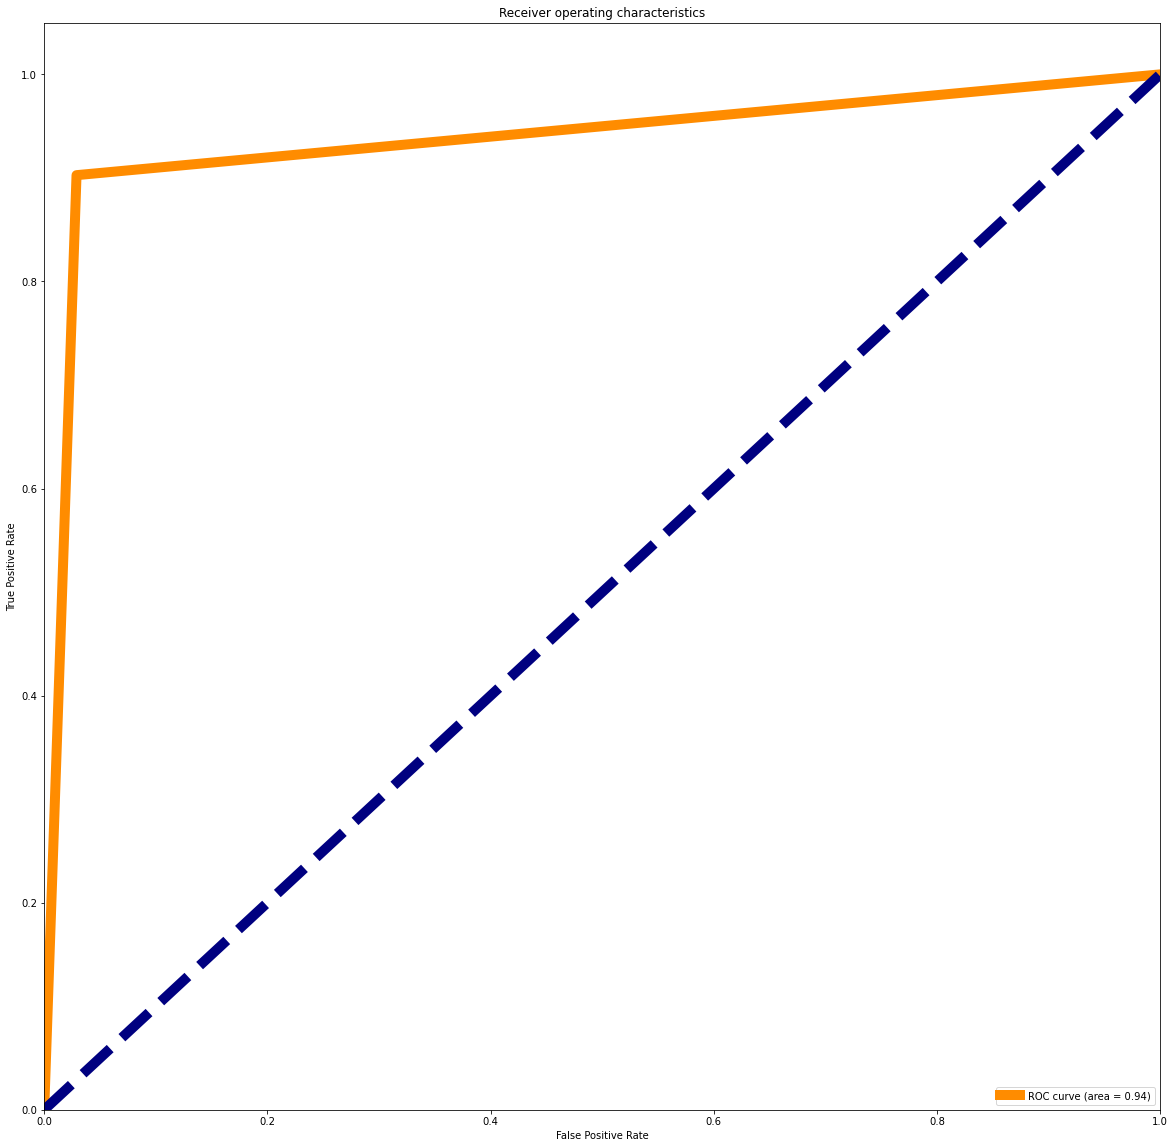

In [136]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### We can see that Our area under RoC curve is =94% Very good.,bcz the more the area is under the curve more the accuracy will be

# Multiple Classification

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train=algorithm_instance.predict(x_train)
    model_1_pred_test=algorithm_instance.predict(x_test)
    print ('accuracy of training model :-',accuracy_score(y_train,model_1_pred_train))
    print ('accuracy of test data :-',accuracy_score(y_test,model_1_pred_test))
    print ('classification report for test data \n', classification_report(y_test,model_1_pred_test))
    print ('classification report for test data \n', classification_report(y_train,model_1_pred_train))
    print ('confusion matrix : \n',confusion_matrix(y_test,model_1_pred_test))

In [139]:
# Logistics regression score
model_selection(lr,x_train,y_train,x_test,y_test)

accuracy of training model :- 0.9342420713747517
accuracy of test data :- 0.9336986301369863
classification report for test data 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      1803
           1       0.90      0.97      0.94      1847

    accuracy                           0.93      3650
   macro avg       0.94      0.93      0.93      3650
weighted avg       0.94      0.93      0.93      3650

classification report for test data 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      7323
           1       0.90      0.97      0.94      7276

    accuracy                           0.93     14599
   macro avg       0.94      0.93      0.93     14599
weighted avg       0.94      0.93      0.93     14599

confusion matrix : 
 [[1609  194]
 [  48 1799]]


In [140]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

model_selection(dt,x_train,y_train,x_test,y_test)

accuracy of training model :- 1.0
accuracy of test data :- 0.9810958904109589
classification report for test data 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1803
           1       0.99      0.98      0.98      1847

    accuracy                           0.98      3650
   macro avg       0.98      0.98      0.98      3650
weighted avg       0.98      0.98      0.98      3650

classification report for test data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7323
           1       1.00      1.00      1.00      7276

    accuracy                           1.00     14599
   macro avg       1.00      1.00      1.00     14599
weighted avg       1.00      1.00      1.00     14599

confusion matrix : 
 [[1776   27]
 [  42 1805]]


### Decision Tree is performing good

In [141]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

model_selection(kn,x_train,y_train,x_test,y_test)

accuracy of training model :- 0.9838345092129598
accuracy of test data :- 0.9783561643835617
classification report for test data 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1803
           1       0.98      0.98      0.98      1847

    accuracy                           0.98      3650
   macro avg       0.98      0.98      0.98      3650
weighted avg       0.98      0.98      0.98      3650

classification report for test data 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      7323
           1       0.99      0.98      0.98      7276

    accuracy                           0.98     14599
   macro avg       0.98      0.98      0.98     14599
weighted avg       0.98      0.98      0.98     14599

confusion matrix : 
 [[1767   36]
 [  43 1804]]


### KNeighbors is also performing good but not better than Decision Tree

In [142]:
from sklearn.svm import SVC
sv=SVC()

model_selection(sv,x_train,y_train,x_test,y_test)

accuracy of training model :- 0.8978012192615933
accuracy of test data :- 0.9002739726027398
classification report for test data 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      1803
           1       0.87      0.95      0.91      1847

    accuracy                           0.90      3650
   macro avg       0.90      0.90      0.90      3650
weighted avg       0.90      0.90      0.90      3650

classification report for test data 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      7323
           1       0.86      0.95      0.90      7276

    accuracy                           0.90     14599
   macro avg       0.90      0.90      0.90     14599
weighted avg       0.90      0.90      0.90     14599

confusion matrix : 
 [[1531  272]
 [  92 1755]]


### SVC is not performining as good as DT and KNC

In [143]:
mm=pd.DataFrame([["Logistic Regression","94%"],["Decision Tree Classifier","100%"],["KNeighbors Classifier","98%"]],
                    columns=["Model_Name","R2_SCORE"])

mm

,Model_Name,R2_SCORE
0,Logistic Regression,94%
1,Decision Tree Classifier,100%
2,KNeighbors Classifier,98%


# DT as final Model

In [144]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [145]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],'random_state':list(range(0,100))
}

In [146]:
xx=GridSearchCV(dt,params)
xx.fit(x_train,y_train)
print(xx.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'random_state': 52}


In [147]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=5,random_state=52)
dt.fit(x_train,y_train)
dt_score_training = dt.score(x_train,y_train)
pred_dt=dt.predict(x_test)
dt_score_training*100

99.3766696349065

# Now save the Model

In [148]:
#Saving the model using .pkl
import joblib
joblib.dump(dt,"Avocado_Classif.pkl")

['Avocado_Classif.pkl']

# Prediction

In [149]:
#Loading the saved model
aa=joblib.load("Avocado_Classif.pkl")


In [150]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [151]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
Predicted,0,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,1,0,0,1,1
Original,0,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,1,0,0,1,1


# Model is perofming good

# Done with Regression and Classification in same file